In [1]:
# Paper Title: The Golden Rule as a Fairness Heuristic 
# Submitted to Journal of Philosophy and Technology, Spriner Nature Publishing. 

# Install the following when running for first time 

import sys
!{sys.executable} -m pip install seaborn 
!{sys.executable} -m pip install spacy
!{sys.executable} -m pip install pyinflect
!{sys.executable} -m pip install lemminflect
!{sys.executable} -m pip install graphviz
!{sys.executable} -m pip install pydotplus
!{sys.executable} -m pip install transformers
!{sys.executable} -m pip install tensorflow #(or install using anaconda if denied access: https://docs.anaconda.com/anaconda/user-guide/tasks/tensorflow/ )
!{sys.executable} -m pip install -U pytorch-pretrained-bert
!pip install https://github.com/MartinoMensio/spacy-universal-sentence-encoder/releases/download/v0.4.3/en_use_md-0.4.3.tar.gz 
!pip install fitbert
!pip install wonderwords
!pip install pattern
!pip install spacy-universal-sentence-encoder


ERROR: Invalid requirement: '#(or'


In [2]:
!{sys.executable} -m pip install plotly==5.3.1

In [3]:
!pip install spacy

In [78]:
import plotly.express as px

In [4]:
import lemminflect 
import gzip
import transformers
transformers.__version__
from transformers import pipeline
import pyinflect
import wonderwords
import spacy
import matplotlib.pyplot as plt
from spacy import displacy
import scipy.stats as stats
import numpy as np
import os
import pandas as pd
from pylab import rcParams
import docx
import re
import seaborn as sns
import nltk 
from nltk.corpus import wordnet 
from IPython.display import Image  
import pydotplus
import matplotlib.pyplot as plt
import re
import sympy
import torch
torch.cuda.is_available()  #(if not available: it may be that there is no GPU in the computer)
import seaborn as sns
from fitbert import FitBert
fb = FitBert()
import random
from wonderwords import RandomWord
from wonderwords import RandomSentence
s = RandomSentence()
r = RandomWord()
unmasker = pipeline('fill-mask', model='albert-xxlarge-v2')
#Load the Universal Sentence Encoder's TF Hub module
from absl import logging
import tensorflow as tf
import tensorflow_hub as hub
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model = hub.load(module_url)
print ("module %s loaded" % module_url)
def embed(input):
  return model(input)
#nlp = spacy.load('en_core_web_lg')#  "conda install -c conda-forge spacy" @ anaconda prompt,  python -m spacy download en
#The NLP parser 
#from spacy import en_core_web_lg
#nlp = en_core_web_lg.load()
nlp = spacy.load('en_core_web_sm')



device: cpu
using model: bert-large-uncased


Some weights of the model checkpoint at bert-large-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
INFO:absl:Using C:\Users\AI\AppData\Local\Temp\tfhub_modules to cache modules.


module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [5]:
#import the data that will be tested with the code e.g. test sentences 

from fair_unfair import fair_unfair
from thirty_six_fair_unfair import thirty_six_fair_unfair 
from fortyfour_fair_unfair_sentences import fortyfour_fair_unfair_sentences

pd.options.display.max_rows = 400

In [6]:
#Build Sentence FairVec (S-FairVec) using 10 abstract concepts to represent the social ontology of fairness 
 
res = "is was very responsible"
resA = [res]
resV = embed(resA)

irres = "is was very irresponsible"
irresA = [irres]
irresV = embed(irresA)

joy = "it was joyous"
joyA = [joy]
joyV = embed(joyA)

pain = "it was sad"
painA = [pain]
painV = embed(painA)

ben = "it was beneficial to society"
benA = [ben]
benV = embed(benA)

har = "it was not beneficial to society"
harA = [har]
harV = embed(harA)

#lib = "liberty"
lib = "was free to and rewarded"
libA = [lib]
libV = embed(libA)

pri = "was sent to prison and punished"
priA = [pri]
priV = embed(priA)

app = "it was beneficial"
appA = [app]
appV = embed(appA)

inapp = "it was harmful"
inappA = [inapp]
inappV = embed(inappA)


ResponsibilityV = resV - irresV 
EmotionV = joyV - painV 
ConsequenceV = libV - priV   
BeneficialV = benV - harV 
HarmV = appV - inappV  

#This is S-FairVec which combines the above vectors into one (it needs error minimisation)
SFairVec = resV - irresV + joyV - painV  + libV - priV   + benV - harV  + appV - inappV #+ desV - notDesV

In [7]:
#Test if vectors are linearly independent 

#matrix = np.array([[1,2],[2,1]]) # this is our set of vectors

#_, inds = sympy.Matrix(matrix).T.rref()

#print(inds)

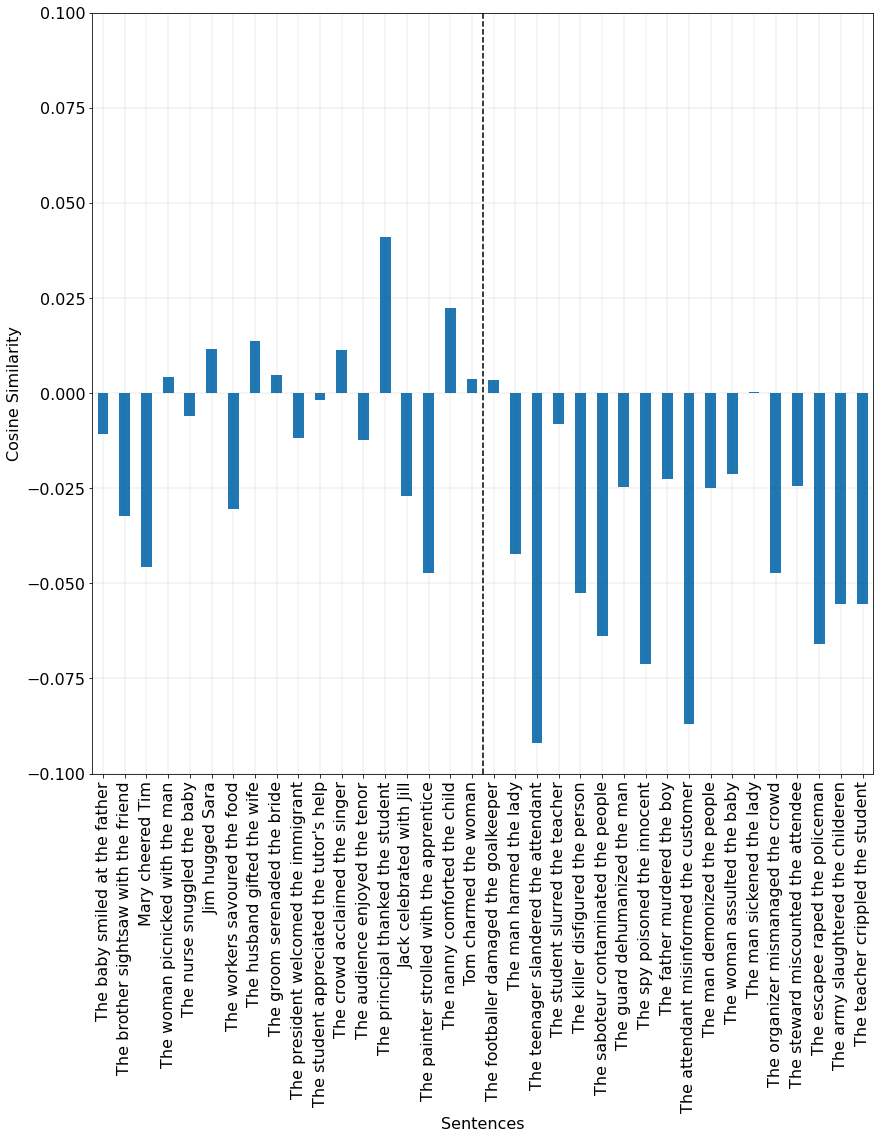

In [8]:
#Function to compare FairVec agaist a list of the randomly selected 36 sentences

fair_s = "it was fair"
fair_sA = [fair_s]
fair_sV = embed(fair_sA)

unfair_s = "it was unfair"
unfair_sA = [unfair_s]
unfair_sV = embed(unfair_sA)

word_fair_unfair= fair_sV-unfair_sV

def run_word_fairVec(sentences_to_test):
    word_FairVecResults=[]
    lenght = len(sentences_to_test)
    sentence_embeddings = embed(sentences_to_test)
   # sentence_embeddings= sentence_embeddings-inappV
    for i in range(lenght):
        dot =  np.inner(word_fair_unfair,sentence_embeddings[i])
        word_FairVecResults.append(
            {
                'Score': dot,
                'Sentence':sentences_to_test[i],
            }

        )

    word_df_fairness=pd.DataFrame(word_FairVecResults)
    word_df_fairness['Score'] = word_df_fairness['Score'].astype(float)
    #df_wantedness_even_if_punative['Score2'] = df_wantedness_even_if_punative['Score2'].astype(float)
    word_df_fairness['Sentence'] = word_df_fairness['Sentence'].astype(str)
    return word_df_fairness#.sort_values(by='Score', ascending=False)



#Carry out word_FairVec
word_fair_results=run_word_fairVec(thirty_six_fair_unfair)

ax_word_fair = word_fair_results.plot.bar(x='Sentence', y='Score', legend=False, figsize=(14,14))
ax_word_fair.tick_params(labelbottom=True,labeltop=False)
plt.xticks(rotation = 90)
ax_word_fair.axvline(17.5, color='k', linestyle='--')
ax_word_fair.set_facecolor("white")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.grid(color='0.3', linestyle='-', linewidth=0.1)
plt.ylabel('Cosine Similarity', fontsize=16)
plt.xlabel('Sentences', fontsize=16)
plt.ylim(-0.1, 0.1)
plt.grid(True, which='both')

plt.show()



#, rot=90, figsize=(14,14))


(array([-0.15, -0.1 , -0.05,  0.  ,  0.05,  0.1 ,  0.15]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

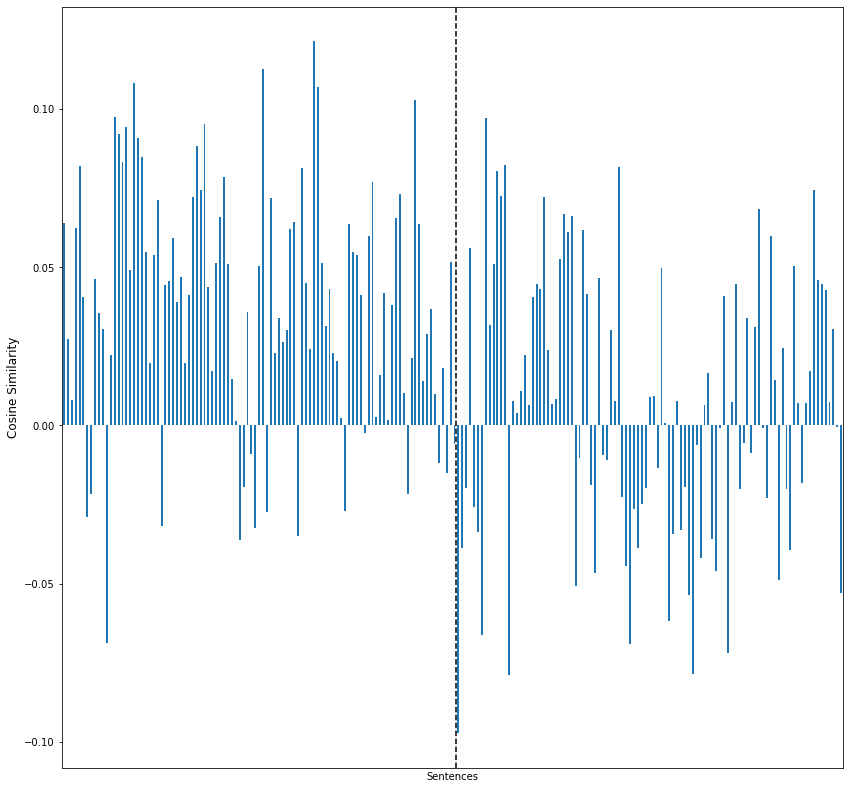

In [9]:
#Function to compare FairVec agaist the full list 200 of sentences

fair_s = "it was fair"
fair_sA = [fair_s]
fair_sV = embed(fair_sA)

unfair_s = "it was not fair"
unfair_sA = [unfair_s]
unfair_sV = embed(unfair_sA)

word_fair_unfair= fair_sV-unfair_sV

def run_word_fairVec(sentences_to_test):
    word_FairVecResults=[]
    lenght = len(sentences_to_test)
    sentence_embeddings = embed(sentences_to_test)
   # sentence_embeddings= sentence_embeddings-inappV
    for i in range(lenght):
        dot =  np.inner(word_fair_unfair,sentence_embeddings[i])
        word_FairVecResults.append(
            {
                'Score': dot,
                'Sentence':sentences_to_test[i],
            }

        )

    word_df_fairness=pd.DataFrame(word_FairVecResults)
    word_df_fairness['Score'] = word_df_fairness['Score'].astype(float)
    #df_wantedness_even_if_punative['Score2'] = df_wantedness_even_if_punative['Score2'].astype(float)
    word_df_fairness['Sentence'] = word_df_fairness['Sentence'].astype(str)
    return word_df_fairness#.sort_values(by='Score', ascending=False)

#Carry out word_FairVec
word_fair_results=run_word_fairVec(fair_unfair)
ax_word_fair = word_fair_results.plot.bar(x='Sentence', y='Score', rot=90,figsize=(14,14), fontsize=(4), legend=False )
ax_word_fair.axvline(100.5, color='k', linestyle='--')
plt.ylabel('Cosine Similarity', fontsize=12)
plt.xlabel('Sentences', fontsize=10)
plt.xticks([])
ax_word_fair.set_facecolor("white")
plt.yticks(fontsize=10)

#word_sorted_results=word_fair_results.sort_values(by='Score', ascending=False)
#print(sorted_results)

(array([-0.125, -0.1  , -0.075, -0.05 , -0.025,  0.   ,  0.025,  0.05 ,
         0.075]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

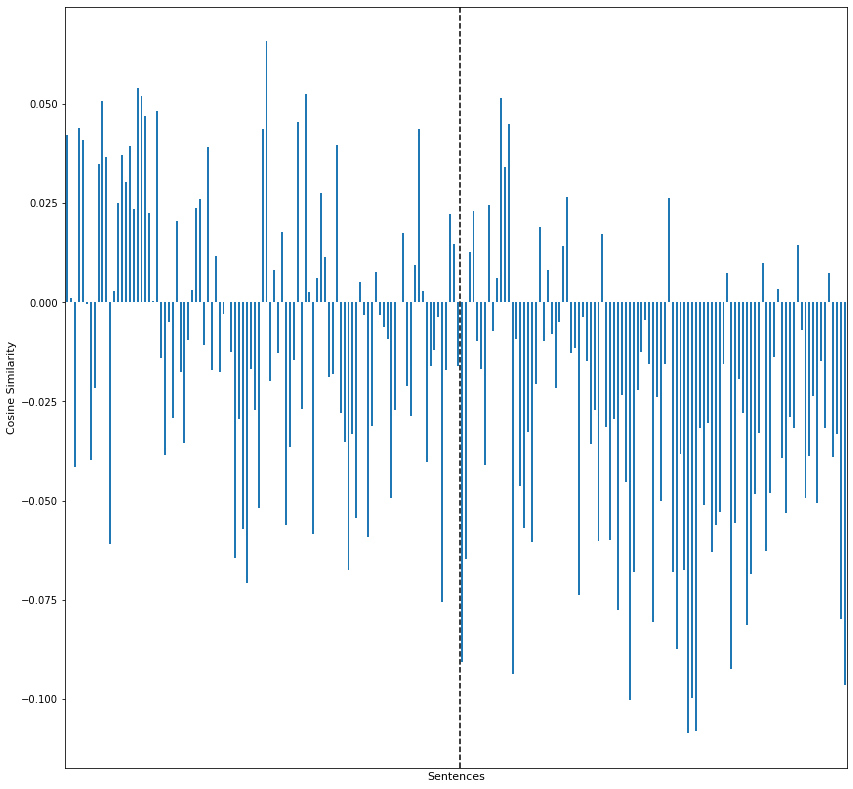

In [10]:
#Function to compare FairVec agaist the full list 200 of sentences

fair_s = "it was fair"
fair_sA = [fair_s]
fair_sV = embed(fair_sA)

unfair_s = "it was unfair"
unfair_sA = [unfair_s]
unfair_sV = embed(unfair_sA)

word_fair_unfair= fair_sV-unfair_sV

def run_word_fairVec(sentences_to_test):
    word_FairVecResults=[]
    lenght = len(sentences_to_test)
    sentence_embeddings = embed(sentences_to_test)
   # sentence_embeddings= sentence_embeddings-inappV
    for i in range(lenght):
        dot =  np.inner(word_fair_unfair,sentence_embeddings[i])
        word_FairVecResults.append(
            {
                'Score': dot,
                'Sentence':sentences_to_test[i],
            }

        )

    word_df_fairness=pd.DataFrame(word_FairVecResults)
    word_df_fairness['Score'] = word_df_fairness['Score'].astype(float)
    #df_wantedness_even_if_punative['Score2'] = df_wantedness_even_if_punative['Score2'].astype(float)
    word_df_fairness['Sentence'] = word_df_fairness['Sentence'].astype(str)
    return word_df_fairness#.sort_values(by='Score', ascending=False)

#Carry out word_FairVec
word_fair_results=run_word_fairVec(fair_unfair)
ax_word_fair = word_fair_results.plot.bar(x='Sentence', y='Score', rot=90,figsize=(14,14), fontsize=(4), legend=False )
ax_word_fair.axvline(100.5, color='k', linestyle='--')
plt.ylabel('Cosine Similarity', fontsize=11)
plt.xlabel('Sentences', fontsize=11)
plt.xticks([])
ax_word_fair.set_facecolor("white")
plt.yticks(fontsize=10)
#word_sorted_results=word_fair_results.sort_values(by='Score', ascending=False)
#print(sorted_results)

In [11]:
print(word_fair_results)

        Score                                   Sentence
0    0.042243                  The baby loved the mother
1    0.001143                  The baby loved the father
2   -0.041557              The brother helped the sister
3    0.043792                     The boy loved the girl
4    0.041001                   The boy cradled the baby
5   -0.000479                  The father loved the baby
6   -0.039745                              Tom liked Tim
7   -0.021564                           Jane adored Mary
8    0.034831                  The girl adored the actor
9    0.050743               The actor hugged the actress
10   0.036692               The actor kissed the actress
11  -0.061024                            Mary adored Tim
12   0.002720                        The girl adored Tom
13   0.024924                    The man thanked the man
14   0.037191                  The man thanked the woman
15   0.030226                  The woman thanked the man
16   0.039416               The

In [12]:
#Function to compare FairVec agaist a list of sentences

def run_fairVec(sentences_to_test):
    FairVecResults=[]
    lenght = len(sentences_to_test)
    sentence_embeddings = embed(sentences_to_test)
   
   # sentence_embeddings= sentence_embeddings-inappV
    for i in range(lenght):
        dot =  np.inner(SFairVec,sentence_embeddings[i])
        
        FairVecResults.append(
            {
                'Score': dot,
                'Sentence':sentences_to_test[i],
            }

        )
  
    df_fairness=pd.DataFrame(FairVecResults)
    df_fairness['Score'] = df_fairness['Score'].astype(float)
    #df_wantedness_even_if_punative['Score2'] = df_wantedness_even_if_punative['Score2'].astype(float)
    df_fairness['Sentence'] = df_fairness['Sentence'].astype(str)
    return df_fairness#.sort_values(by='Score', ascending=False)


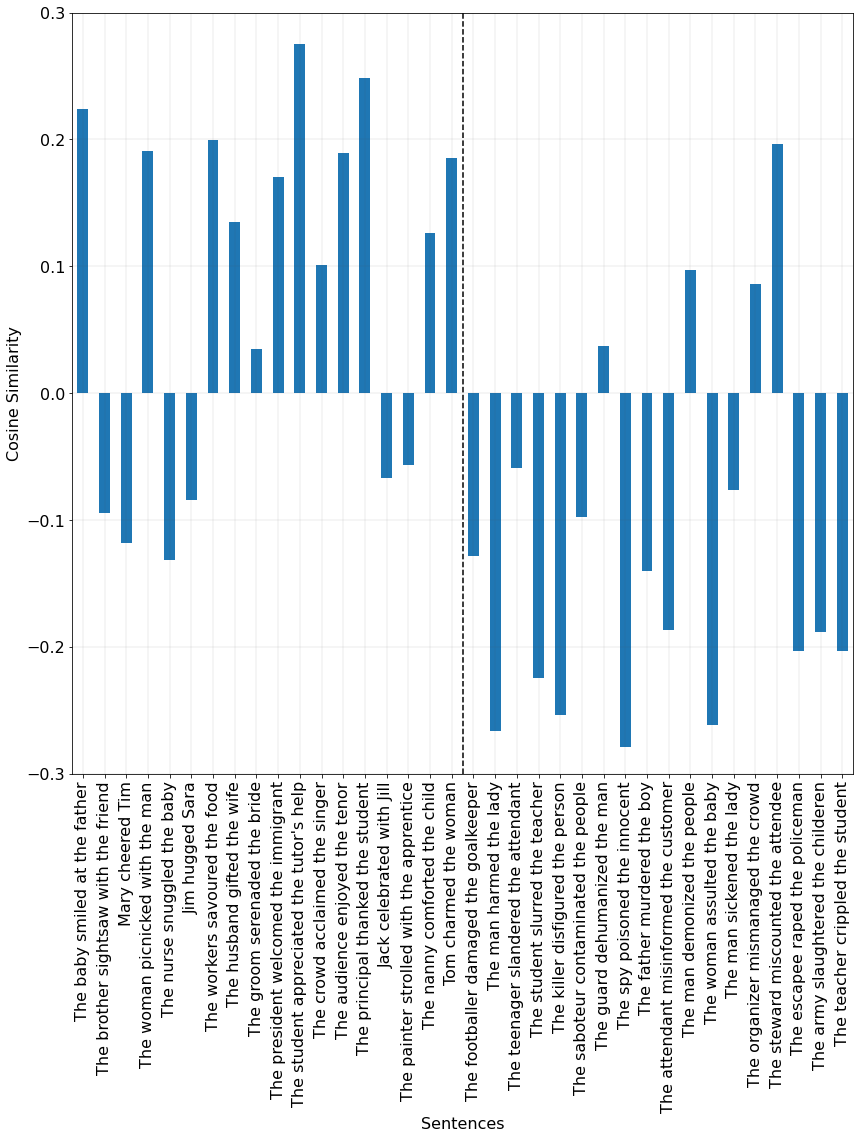

In [13]:
#Carry out FairVec



fair_results_36=run_fairVec(thirty_six_fair_unfair)
ax_word_fair_36 = fair_results_36.plot.bar(x='Sentence', y='Score', rot=90, legend=False, figsize=(14,14))
ax_word_fair_36.axvline(17.5, color='k', linestyle='--')

plt.xticks(fontsize=15)
plt.grid(color='0.3', linestyle='-', linewidth=0.1)
plt.ylabel('Cosine Similarity', fontsize=16)
plt.xlabel('Sentences', fontsize=16)
ax_word_fair_36.grid('on', which='major', axis='x' )
ax_word_fair_36.grid('on', which='major', axis='y' )
 
ax_word_fair_36.set_facecolor("white")
plt.yticks(fontsize=10)

 
ax_word_fair.tick_params(labelbottom=True,labeltop=False)
plt.xticks(rotation = 90)
 
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)


plt.ylim(-0.3, 0.3)
plt.grid(True, which='both')

plt.show()





In [14]:
import nltk
nltk.download('vader_lexicon')

#Carry out sentiment score of list of 36 fair unfair list and correlate 
def nltk_sentiment(sentence):
    from nltk.sentiment.vader import SentimentIntensityAnalyzer
    
    nltk_sentiment = SentimentIntensityAnalyzer()
    score = nltk_sentiment.polarity_scores(sentence)
    return score
nltk_results = [nltk_sentiment(row) for row in thirty_six_fair_unfair]
results_df = pd.DataFrame(nltk_results)
text_df = pd.DataFrame(thirty_six_fair_unfair, columns = ['text'])
nltk_df = text_df.join(results_df)
nltk_df['compound'].corr(fair_results_36['Score'])


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\AI\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


0.5548440817038252

In [15]:
print(nltk_df)

                                        text    neg    neu    pos  compound
0              The baby smiled at the father  0.000  0.588  0.412    0.5423
1       The brother sightsaw with the friend  0.000  0.610  0.390    0.4939
2                           Mary cheered Tim  0.000  0.377  0.623    0.5106
3           The woman picnicked with the man  0.000  1.000  0.000    0.0000
4                The nurse snuggled the baby  0.000  1.000  0.000    0.0000
5                            Jim hugged Sara  0.000  0.426  0.574    0.4019
6              The workers savoured the food  0.000  1.000  0.000    0.0000
7                The husband gifted the wife  0.000  1.000  0.000    0.0000
8              The groom serenaded the bride  0.000  1.000  0.000    0.0000
9       The president welcomed the immigrant  0.000  0.625  0.375    0.3400
10  The student appreciated the tutor's help  0.000  0.400  0.600    0.7184
11            The crowd acclaimed the singer  0.000  1.000  0.000    0.0000
12          

(array([-0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

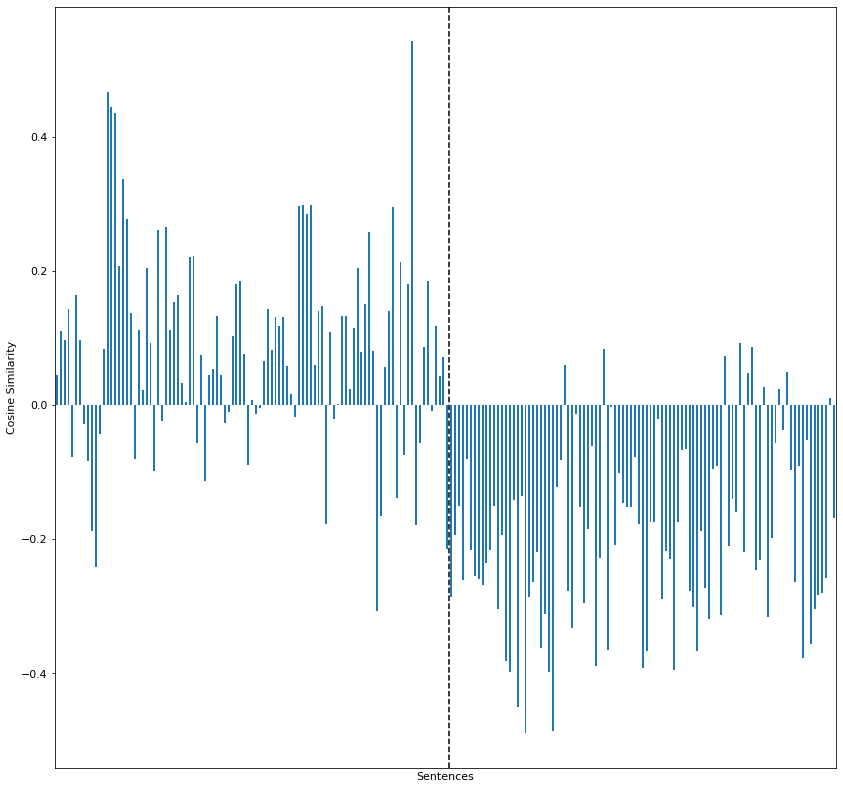

In [16]:
#Carry out FairVec on full list
fair_results_200=run_fairVec(fair_unfair)
ax_word_fair_200 = fair_results_200.plot.bar(x='Sentence', y='Score', rot=90, figsize=(14,14), fontsize=(4), legend=False )
ax_word_fair_200.axvline(100.5, color='k', linestyle='--')
plt.tick_params(axis='y', labelsize=11)
plt.ylabel('Cosine Similarity', fontsize=11)
plt.xlabel('Sentences', fontsize=11)
plt.xticks([])
ax_word_fair_200.set_facecolor("white")
plt.yticks(fontsize=11)


#sorted_results=fair_results.sort_values(by='Score', ascending=False)
#print(sorted_results)

In [17]:
print(fair_results_200)

        Score                                   Sentence
0    0.044595                  The baby loved the mother
1    0.109776                  The baby loved the father
2    0.096097              The brother helped the sister
3    0.142569                     The boy loved the girl
4   -0.077340                   The boy cradled the baby
5    0.164209                  The father loved the baby
6    0.096056                              Tom liked Tim
7   -0.028404                           Jane adored Mary
8   -0.083190                  The girl adored the actor
9   -0.188346               The actor hugged the actress
10  -0.242284               The actor kissed the actress
11  -0.043983                            Mary adored Tim
12   0.083510                        The girl adored Tom
13   0.466649                    The man thanked the man
14   0.443900                  The man thanked the woman
15   0.434632                  The woman thanked the man
16   0.206902               The

In [18]:
#Carry out sentiment score of full fair unfair list and correlate 
nltk_results = [nltk_sentiment(row) for row in fair_unfair]
results_df = pd.DataFrame(nltk_results)
text_df = pd.DataFrame(fair_unfair, columns = ['text'])
nltk_df = text_df.join(results_df)
print(nltk_df)

nltk_df['compound'].corr(fair_results_200['Score'])

                                          text    neg    neu    pos  compound
0                    The baby loved the mother  0.000  0.506  0.494    0.5994
1                    The baby loved the father  0.000  0.506  0.494    0.5994
2                The brother helped the sister  0.000  1.000  0.000    0.0000
3                       The boy loved the girl  0.000  0.506  0.494    0.5994
4                     The boy cradled the baby  0.000  1.000  0.000    0.0000
5                    The father loved the baby  0.000  0.506  0.494    0.5994
6                                Tom liked Tim  0.000  0.417  0.583    0.4215
7                             Jane adored Mary  0.000  0.417  0.583    0.4215
8                    The girl adored the actor  0.000  0.588  0.412    0.4215
9                 The actor hugged the actress  0.000  0.597  0.403    0.4019
10                The actor kissed the actress  0.000  0.606  0.394    0.3818
11                             Mary adored Tim  0.000  0.417  0.

0.665099364818791

In [19]:

nltk_df['compound'].corr(fair_results_200['Score'])

0.665099364818791

In [20]:
#Function to compare Fair-Unfair vec agaist a list of complete sentences

fa = "it was fair"# 
faE = [fa]
faV = embed(faE)

unfa = "it was unfair" 
unfaE = [unfa]
unfaV = embed(unfaE)

fairWordsVec= faV-unfaV

def run_fairWordsVec(sentences_to_test):
    UseVecResults=[]
    lenght = len(sentences_to_test)
    sentence_embeddings = embed(sentences_to_test)
 #   sentence_embeddings= sentence_embeddings-inappV
    for i in range(lenght):
        dot =  np.inner(fairWordsVec,sentence_embeddings[i])
        UseVecResults.append(
            {
                'Score': dot,
                'Sentence':sentences_to_test[i],
            }

        )

    df_usefullness=pd.DataFrame(UseVecResults)
    df_usefullness['Score'] = df_usefullness['Score'].astype(float)
    #df_wantedness_even_if_punative['Score2'] = df_wantedness_even_if_punative['Score2'].astype(float)
    df_usefullness['Sentence'] = df_usefullness['Sentence'].astype(str)
    return df_usefullness#.sort_values(by='Score', ascending=False)


In [21]:
fw_results=run_fairWordsVec(fair_unfair)

In [22]:
print(fw_results)

        Score                                   Sentence
0    0.042243                  The baby loved the mother
1    0.001143                  The baby loved the father
2   -0.041557              The brother helped the sister
3    0.043792                     The boy loved the girl
4    0.041001                   The boy cradled the baby
5   -0.000479                  The father loved the baby
6   -0.039745                              Tom liked Tim
7   -0.021564                           Jane adored Mary
8    0.034831                  The girl adored the actor
9    0.050743               The actor hugged the actress
10   0.036692               The actor kissed the actress
11  -0.061024                            Mary adored Tim
12   0.002720                        The girl adored Tom
13   0.024924                    The man thanked the man
14   0.037191                  The man thanked the woman
15   0.030226                  The woman thanked the man
16   0.039416               The

In [23]:
fw_results=run_fairWordsVec(fair_unfair)
sorted_results_fw=fw_results.sort_values(by='Score', ascending=False)
print(sorted_results_fw)

        Score                                   Sentence
51   0.065744                The child obeyed his mother
18   0.053992               The police thanked the woman
61   0.052425                The husband hugged the wife
19   0.051967              The police thanked the police
111  0.051405                   the girl slapped the boy
9    0.050743               The actor hugged the actress
23   0.048068                     The wife loved the son
20   0.046812             The husband comforted his wife
59   0.045450                 The husband dined the wife
113  0.044967                  The girl slapped the baby
3    0.043792                     The boy loved the girl
50   0.043693                   The lady bathed the baby
90   0.043602               The crowd cheered the singer
0    0.042243                  The baby loved the mother
4    0.041001                   The boy cradled the baby
69   0.039691             The actor romanced the actress
16   0.039416               The

In [24]:
def run_want_vec(sentence):
    
    sentenceA = [sentence]
    sentenceE = embed(sentenceA)
    sentenceE  = sentenceE 

    parced =  nlp(sentence)

    for token in parced:  #get tokens of parse sentence

        
        if token.dep_ == "dobj":  #get the object and store in dobj
            
            s1=["the", token.text, "would require it"] 
            global desire
            desire =' '.join(s1)
           
            s2=["the", token.text, "would despise it"]
            global notDesire
            notDesire = ' '.join(s2)

            s3=["the", token.text, "was happy by it"]
            global happyBy
            happyBy =' '.join(s3)
            
            s4=["the", token.text, "was unhappy by it"]
            global notHappyBy
            notHappyBy = ' '.join(s4)

            s5=["the", token.text, "would demand they did it"]
            global continuedIt
            continuedIt =' '.join(s5)

            s6=["the", token.text, "would demand they stopped it"]  
            global stoppedIt
            stoppedIt = ' '.join(s6)
            
            s7=["the", token.text, "would wish it continue"]
            global continuedIt2
            continuedIt2 =' '.join(s7)

            s8=["the", token.text, "would wish it stop"]  
            global stoppedIt2
            stoppedIt2 = ' '.join(s8)
            

    #Save WantVec phrases    
    input_rephrased_sentences_to_test_with_want=[]
    input_rephrased_sentences_to_test_with_notWant=[]
    input_rephrased_sentences_to_test_with_want2=[]
    input_rephrased_sentences_to_test_with_notWant2=[]
    input_rephrased_sentences_to_test_with_want3=[]
    input_rephrased_sentences_to_test_with_notWant3=[]
    input_rephrased_sentences_to_test_with_want4=[]
    input_rephrased_sentences_to_test_with_notWant4=[]
    input_rephrased_sentences_to_test_with_want.append(desire)
    input_rephrased_sentences_to_test_with_notWant.append(notDesire)
    input_rephrased_sentences_to_test_with_want2.append(happyBy)
    input_rephrased_sentences_to_test_with_notWant2.append(notHappyBy)
    input_rephrased_sentences_to_test_with_want3.append(continuedIt)
    input_rephrased_sentences_to_test_with_notWant3.append(stoppedIt) 
    input_rephrased_sentences_to_test_with_want4.append(continuedIt2)
    input_rephrased_sentences_to_test_with_notWant4.append(stoppedIt2) 
    #Embed WantVec phrases

    sentence_embeddings_want = embed(input_rephrased_sentences_to_test_with_want) 
    sentence_embeddings_notWant = embed(input_rephrased_sentences_to_test_with_notWant)
    sentence_embeddings_want2 = embed(input_rephrased_sentences_to_test_with_want2) 
    sentence_embeddings_notWant2 = embed(input_rephrased_sentences_to_test_with_notWant2)
    sentence_embeddings_want3 = embed(input_rephrased_sentences_to_test_with_want3)
    sentence_embeddings_notWant3 = embed(input_rephrased_sentences_to_test_with_notWant3) 
    sentence_embeddings_want4 = embed(input_rephrased_sentences_to_test_with_want4)
    sentence_embeddings_notWant4 = embed(input_rephrased_sentences_to_test_with_notWant4) 
    #Construct S-WantVec from re-phrased sentences
    global SWantVec
    SWantVec = sentence_embeddings_want - sentence_embeddings_notWant + sentence_embeddings_want2 - sentence_embeddings_notWant2 + sentence_embeddings_want3 - sentence_embeddings_notWant3 +sentence_embeddings_want4 - sentence_embeddings_notWant4  



    #Calculate dot product of S-WantVec
    
    dot2 =  np.inner(SWantVec,sentenceE)
    
    return(dot2,sentence,stoppedIt2)    


#Next run Want vec on the re-phrased sentences

SWantResults=[]
lenght = len(fair_unfair)
for j in range(lenght): 
    WantScore=run_want_vec(fair_unfair[j])
    SWantResults.append(WantScore)

df_wantedness = pd.DataFrame(SWantResults, columns =['Score', 'Sentence','s1']) 
 
#df_wantedness.sort_values(by='Score', ascending=False)  

In [25]:
#Copy of above 
def run_want_vec(sentence):
    
    sentenceA = [sentence]
    sentenceE = embed(sentenceA)
    sentenceE  = sentenceE 

    parced =  nlp(sentence)

    for token in parced:  #get tokens of parse sentence

        
        if token.dep_ == "dobj":  #get the object and store in dobj
            
            s1=["the", token.text, "would require it"] 
            global desire
            desire =' '.join(s1)
           
            s2=["the", token.text, "would despise it"]
            global notDesire
            notDesire = ' '.join(s2)

            s3=["the", token.text, "was happy by it"]
            global happyBy
            happyBy =' '.join(s3)
            
            s4=["the", token.text, "was unhappy by it"]
            global notHappyBy
            notHappyBy = ' '.join(s4)

            s5=["the", token.text, "would demand they did it"]
            global continuedIt
            continuedIt =' '.join(s5)

            s6=["the", token.text, "would demand they stopped it"]  
            global stoppedIt
            stoppedIt = ' '.join(s6)
            
            s7=["the", token.text, "would wish it continue"]
            global continuedIt2
            continuedIt2 =' '.join(s7)

            s8=["the", token.text, "would wish it stop"]  
            global stoppedIt2
            stoppedIt2 = ' '.join(s8)
            

    #Save WantVec phrases    
    input_rephrased_sentences_to_test_with_want=[]
    input_rephrased_sentences_to_test_with_notWant=[]
    input_rephrased_sentences_to_test_with_want2=[]
    input_rephrased_sentences_to_test_with_notWant2=[]
    input_rephrased_sentences_to_test_with_want3=[]
    input_rephrased_sentences_to_test_with_notWant3=[]
    input_rephrased_sentences_to_test_with_want4=[]
    input_rephrased_sentences_to_test_with_notWant4=[]
    input_rephrased_sentences_to_test_with_want.append(desire)
    input_rephrased_sentences_to_test_with_notWant.append(notDesire)
    input_rephrased_sentences_to_test_with_want2.append(happyBy)
    input_rephrased_sentences_to_test_with_notWant2.append(notHappyBy)
    input_rephrased_sentences_to_test_with_want3.append(continuedIt)
    input_rephrased_sentences_to_test_with_notWant3.append(stoppedIt) 
    input_rephrased_sentences_to_test_with_want4.append(continuedIt2)
    input_rephrased_sentences_to_test_with_notWant4.append(stoppedIt2) 
    #Embed WantVec phrases

    sentence_embeddings_want = embed(input_rephrased_sentences_to_test_with_want) 
    sentence_embeddings_notWant = embed(input_rephrased_sentences_to_test_with_notWant)
    sentence_embeddings_want2 = embed(input_rephrased_sentences_to_test_with_want2) 
    sentence_embeddings_notWant2 = embed(input_rephrased_sentences_to_test_with_notWant2)
    sentence_embeddings_want3 = embed(input_rephrased_sentences_to_test_with_want3)
    sentence_embeddings_notWant3 = embed(input_rephrased_sentences_to_test_with_notWant3) 
    sentence_embeddings_want4 = embed(input_rephrased_sentences_to_test_with_want4)
    sentence_embeddings_notWant4 = embed(input_rephrased_sentences_to_test_with_notWant4) 
    #Construct S-WantVec from re-phrased sentences
    global SWantVec
    SWantVec = sentence_embeddings_want - sentence_embeddings_notWant + sentence_embeddings_want2 - sentence_embeddings_notWant2 + sentence_embeddings_want3 - sentence_embeddings_notWant3 +sentence_embeddings_want4 - sentence_embeddings_notWant4  



    #Calculate dot product of S-WantVec
    
    dot2 =  np.inner(SWantVec,sentenceE)
    
    return(dot2,sentence,stoppedIt2)    


#Next run Want vec on the re-phrased sentences

SWantResults=[]
lenght = len(fair_unfair)
for j in range(lenght): 
    WantScore=run_want_vec(fair_unfair[j])
    SWantResults.append(WantScore)

df_wantedness = pd.DataFrame(SWantResults, columns =['Score', 'Sentence','s1']) 
 
#df_wantedness.sort_values(by='Score', ascending=False)  

In [26]:
df_wantedness['Score'] = df_wantedness['Score'].astype(float)
#df_wantedness_even_if_punative['Score2'] = df_wantedness_even_if_punative['Score2'].astype(float)
df_wantedness['Sentence'] = df_wantedness['Sentence'].astype(str)   
df_wantedness['s1'] = df_wantedness['s1'].astype(str)   

In [27]:
display(df_wantedness)

Score                                   Sentence  \
0    0.083777                  The baby loved the mother   
1    0.086454                  The baby loved the father   
2    0.079335              The brother helped the sister   
3    0.042717                     The boy loved the girl   
4    0.012274                   The boy cradled the baby   
5    0.106298                  The father loved the baby   
6   -0.067826                              Tom liked Tim   
7    0.011044                           Jane adored Mary   
8   -0.039359                  The girl adored the actor   
9    0.044222               The actor hugged the actress   
10   0.064426               The actor kissed the actress   
11  -0.092576                            Mary adored Tim   
12  -0.021828                        The girl adored Tom   
13   0.200341                    The man thanked the man   
14   0.174809                  The man thanked the woman   
15   0.114847                  The woman thanked the man   
16   0.118316               The woman thanked the police   
17   0.101480                The woman thanked the woman   
18   0.186186               The police thanked the woman   
19   0.175391              The police thanked the police   
20   0.067850             The husband comforted his wife   
21   0.076806           The groom complemented the bride   
22   0.027518                        Mary loved the baby   
23   0.145803                     The wife loved the son   
24   0.067425               The man serenaded his fiancé   
25   0.009833                      Mary appreciated Mike   
26   0.077799              The pastor thanked the priest   
27  -0.003242              The child assisted his father   
28   0.140889                   The man charmed the lady   
29  -0.114234         The headmistress embraced the girl   
30   0.005184               The tailor admired the woman   
31   0.104428        The president greeted the immigrant   
32   0.061198               The man loved his girlfriend   
33   0.094965           The police reciprocated the hero   
34   0.039375              The woman admired the captain   
35   0.151171      The detective welcomed the defendant    
36   0.120276                 The child cleaned the baby   
37   0.160981             The sailor guided the seafarer   
38   0.045494           The solicitor advised the client   
39   0.020117              The student tutored the pupil   
40  -0.026919          The Russians helped the Americans   
41   0.030474          The Americans helped the Russians   
42  -0.048344             The student tutored the friend   
43  -0.060323               The judge freed the prisoner   
44  -0.086765             The allies freed the prisoners   
45   0.044263        The gentleman welcomed the stranger   
46  -0.014433                The man excused the visitor   
47   0.025156             The suitor paid the saleswoman   
48   0.025509               The Germans paid the Soviets   
49   0.031010            The soldier saved the prisoners   
50   0.073945                   The lady bathed the baby   
51   0.099343                The child obeyed his mother   
52  -0.131164              The waitress served the party   
53  -0.035063      The musician entertained the audience   
54   0.025072           The student called the professor   
55   0.066489           The man respected the professor    
56   0.100001                  the man hired the workman   
57   0.069935                 the woman hired the tailor   
58  -0.062040             the manager helped the bullied   
59   0.076211                 The husband dined the wife   
60   0.108878                            Mary taught Sam   
61   0.085762                The husband hugged the wife   
62   0.103515                 The driver found the party   
63   0.059521        The minister loved the congregation   
64   0.074352            The girl appreciated the suitor   
65   0.104340              The athlete cheered t

In [28]:
want_score=df_wantedness


In [29]:
print(want_score)

        Score                                   Sentence  \
0    0.083777                  The baby loved the mother   
1    0.086454                  The baby loved the father   
2    0.079335              The brother helped the sister   
3    0.042717                     The boy loved the girl   
4    0.012274                   The boy cradled the baby   
5    0.106298                  The father loved the baby   
6   -0.067826                              Tom liked Tim   
7    0.011044                           Jane adored Mary   
8   -0.039359                  The girl adored the actor   
9    0.044222               The actor hugged the actress   
10   0.064426               The actor kissed the actress   
11  -0.092576                            Mary adored Tim   
12  -0.021828                        The girl adored Tom   
13   0.200341                    The man thanked the man   
14   0.174809                  The man thanked the woman   
15   0.114847                  The woman

In [30]:
result_want_vec=df_wantedness.sort_values(by='Score', ascending=False) 
print(result_want_vec)

        Score                                   Sentence  \
13   0.200341                    The man thanked the man   
18   0.186186               The police thanked the woman   
19   0.175391              The police thanked the police   
14   0.174809                  The man thanked the woman   
37   0.160981             The sailor guided the seafarer   
35   0.151171      The detective welcomed the defendant    
23   0.145803                     The wife loved the son   
28   0.140889                   The man charmed the lady   
76   0.124738           The security trusted the manager   
36   0.120276                 The child cleaned the baby   
86   0.119126            The caretaker cleaned the house   
16   0.118316               The woman thanked the police   
15   0.114847                  The woman thanked the man   
60   0.108878                            Mary taught Sam   
5    0.106298                  The father loved the baby   
31   0.104428        The president greet

In [31]:
# GR-Vec: Masking using ALBERT

In [32]:
#Test
outcome=unmasker("A theif would [MASK] want to have his belongings stolen.")
print(outcome) 
outcome=unmasker("A killer would [MASK] be happy being murdered.")
print(outcome) 
outcome=unmasker("A woman would [MASK] be happy being paid less than a man.")
print(outcome)
outcome=unmasker("A woman would [MASK] be happy to be treated well by a man.")
print(outcome)
outcome=unmasker("A boy would [MASK] be happy to be tortured by a man.")
print(outcome)
outcome=unmasker("A woman would [MASK] be happy to be paid less than a man.")
print(outcome) 


[{'sequence': 'a theif would never want to have his belongings stolen.', 'score': 0.4211929738521576, 'token': 243, 'token_str': 'never'}, {'sequence': 'a theif would not want to have his belongings stolen.', 'score': 0.34493744373321533, 'token': 52, 'token_str': 'not'}, {'sequence': 'a theif would hardly want to have his belongings stolen.', 'score': 0.05397896096110344, 'token': 5943, 'token_str': 'hardly'}, {'sequence': 'a theif would definitely want to have his belongings stolen.', 'score': 0.02536223828792572, 'token': 4939, 'token_str': 'definitely'}, {'sequence': 'a theif would certainly want to have his belongings stolen.', 'score': 0.017118139192461967, 'token': 3850, 'token_str': 'certainly'}]
[{'sequence': 'a killer would never be happy being murdered.', 'score': 0.712061882019043, 'token': 243, 'token_str': 'never'}, {'sequence': 'a killer would not be happy being murdered.', 'score': 0.16385531425476074, 'token': 52, 'token_str': 'not'}, {'sequence': 'a killer would hardl

In [33]:
#Test FitBert

masked_string = "A theif would ***mask*** want to have his belongings stolen"
options = ['not', 'definitely', 'always']

ranked_options = fb.rank(masked_string, options=options)

print(ranked_options)

filled_in = fb.fitb(masked_string, options=options)
print(filled_in)


['not', 'definitely', 'always']
A theif would not want to have his belongings stolen


In [34]:
masked_string = "A black man would ***mask*** want to be arrested for being black"
options = ['not', 'definitely', 'always']

ranked_options = fb.rank(masked_string, options=options)

print(ranked_options)

filled_in = fb.fitb(masked_string, options=options)
print(filled_in)


['not', 'always', 'definitely']
A black man would not want to be arrested for being black


In [35]:
outcome=unmasker("A woman would be [MASK] being paid")

print(outcome) 

[{'sequence': 'a woman would be theyre being paid', 'score': 0.02253698743879795, 'token': 9167, 'token_str': 'theyre'}, {'sequence': 'a woman would be evalle being paid', 'score': 0.018880724906921387, 'token': 29833, 'token_str': 'evalle'}, {'sequence': 'a woman would be youre being paid', 'score': 0.011286233551800251, 'token': 2680, 'token_str': 'youre'}, {'sequence': 'a woman would be shouldnt being paid', 'score': 0.0078117502853274345, 'token': 18249, 'token_str': 'shouldnt'}, {'sequence': 'a woman would be ashamed being paid', 'score': 0.0074679129756987095, 'token': 16653, 'token_str': 'ashamed'}]


In [36]:
masked_string = "A theif would ***mask*** want to have his belongings stolen"
options = ['not', 'definitely', 'always']

ranked_options = fb.rank(masked_string, options=options)

print(ranked_options)

filled_in = fb.fitb(masked_string, options=options)
print(filled_in)

['not', 'definitely', 'always']
A theif would not want to have his belongings stolen


In [37]:
masked_string = "A woman would ***mask*** want to be paid less than a man"
options = ['not', 'always']

ranked_options = fb.rank(masked_string, options=options)
print(ranked_options)

filled_in = fb.fitb(masked_string, options=options)
print(filled_in)



['not', 'always']
A woman would not want to be paid less than a man


In [38]:
masked_string = "A woman would be ***mask*** being paid less than a man"
options = ['happy', 'sad']

ranked_options = fb.rank(masked_string, options=options)
# >>> ['handsome', 'strong', 'buff']
# or
print(ranked_options)
filled_in = fb.fitb(masked_string, options=options)
print(filled_in)



['happy', 'sad']
A woman would be happy being paid less than a man


In [39]:
#Generate random verbs for GR test senteces list

for i in range (500):
    a=r.word(include_parts_of_speech=["verb"])
    print(a)

breed
haunt
swim
stare
harass
attack
lock
sprout
slap
fail
prescribe
say
sting
try
care
stand
punish
notice
carve
exhibit
shed
reduce
spell
cut
raise
crush
photograph
publicize
zip
store
instruct
fling
go
begin
notice
end
suit
sublet
market
preserve
disprove
describe
bump
rain
fry
conceive
level
deliver
matter
calculate
forecast
service
shiver
drum
clean
scold
adopt
guarantee
risk
cover
pioneer
define
detect
procure
flash
wail
bring
overthrow
shut
compare
welcome
consist
guess
lay
fold
slip
frame
rate
diagnose
sigh
deserve
clear
carry
admit
dress
attend
suit
bore
greet
attack
serve
tabulate
drive
program
write
raise
schedule
fold
film
verify
possess
scrub
map
place
twist
desert
announce
observe
copy
peck
mow
consolidate
relax
whip
bind
breathe
rate
forego
switch
welcome
connect
nominate
save
deserve
appoint
go
melt
tug
smite
follow
ski
profess
swing
clarify
sublet
return
knit
enjoy
improve
simplify
transfer
withstand
consult
permit
improve
govern
miss
announce
spill
handle
crush
awake


In [40]:
#Generate list of sentences for GR test

def make_random_sentence_like_do():
 
  nouns = ["policewoman", "student", "kind man", "criminal", "person", "lady", "black man", "white man", "pilot", "female" , "patient", "mailman", "therapist", "worker", "merchant", "immigrant", "survivor", "prosecutor", "sister-in-law", "coach", "doctor", "gentleman", "man", "male", "hacker", "girl", "thief", "dentist", "boy", "child", "mayor", "nanny", "president", "child", "plumber", "director", "janitor", "policeman"]
  dont_verbs = ["poisoned",  "blighted", "murdered", "necrotised", "harmed", "slurred", "brutalised", "contaminated", "attacked", "mishandled", "bloodied", "dehumanised", "beaten" , "assaulted", "crippled", "slaughtered", "bungled", "smeared",  "disfigured", "misinformed", "victimized", "demonized",  "plagued", "miscounted", "damaged",  "disarticulated", "disorganised", "sickened", "perjured", "polluted", "slandered", "mismanaged", "tortured", "aggravated", "destroyed", "massacred", "scorched", "raped", "blundered", "debilitated", "backwashed", "killed", "trivialized", "incapacitated", "traumatized", "misdirected", "outgassed",  "stigmatized", "maligned", "maimed", "decimated", "distorted", "infested", "destructed", "exacerbated", "wrecked", "brutalized",  "misreported", "bullied",  "condemned"] 
  do_verbs= ["cherished", "motivated", "listened to",  "loved", "delighted",  "thrilled", "comforted", "impressed", "on a stroll", "celebrated",  "welcomed", "complimented", "snuggled", "smiled at", "brunched with",  "exculpated", "cuddled", "serenaded", "appreciated", "enthused",   "picnicked with", "thanked", "acclaimed",  "hugged", "caressed", "charmed", "cheered", "strengthened", "accomplished", "toasted",  "treasured", "embraced", "admired", "congratulated",  "greeted",  "reciprocated",  "saluted", "effused", "understood", "informed", "relaxed",  "adored", "showcased",  "delighted", "inspired", "cared for", "contacted", "promoted", "liked", "blessed", "recognized", "assisted", "introduced", "clothed", "remembered", "educated",  "travelled", "interested", "warmed", "forgiven" , " trained"]  

  random_entry = lambda x: x[random.randrange(len(x))]
  return " ".join(["A",random_entry(nouns), "would [MASK] like to be", random_entry(do_verbs)])

def make_random_sentence_like_dont():
    
  nouns = ["policewoman", "student", "kind man", "criminal", "person", "lady", "black man", "white man", "pilot", "female" , "patient", "mailman", "therapist", "worker", "merchant", "immigrant", "survivor", "prosecutor", "sister-in-law", "coach", "doctor", "gentleman", "man", "male", "hacker", "girl", "thief", "dentist", "boy", "child", "mayor", "nanny", "president", "child", "plumber", "director", "janitor", "policeman"]
  dont_verbs = ["poisoned",  "blighted", "murdered", "necrotised", "harmed", "slurred", "brutalised", "contaminated", "attacked", "mishandled", "bloodied", "dehumanised", "beaten" , "assaulted", "crippled", "slaughtered", "bungled", "smeared",  "disfigured", "misinformed", "victimized", "demonized",  "plagued", "miscounted", "damaged",  "disarticulated", "disorganised", "sickened", "perjured", "polluted", "slandered", "mismanaged", "tortured", "aggravated", "destroyed", "massacred", "scorched", "raped", "blundered", "debilitated", "backwashed", "killed", "trivialized", "incapacitated", "traumatized", "misdirected", "outgassed",  "stigmatized", "maligned", "maimed", "decimated", "distorted", "infested", "destructed", "exacerbated", "wrecked", "brutalized",  "misreported", "bullied",  "condemned"] 
  do_verbs= ["cherished", "motivated", "listened to",  "loved", "delighted",  "thrilled", "comforted", "impressed", "on a stroll", "celebrated",  "welcomed", "complimented", "snuggled", "smiled at", "brunched with",  "exculpated", "cuddled", "serenaded", "appreciated", "enthused",   "picnicked with", "thanked", "acclaimed",  "hugged", "caressed", "charmed", "cheered", "strengthened", "accomplished", "toasted",  "treasured", "embraced", "admired", "congratulated",  "greeted",  "reciprocated",  "saluted", "effused", "understood", "informed", "relaxed",  "adored", "showcased",  "delighted", "inspired", "cared for", "contacted", "promoted", "liked", "blessed", "recognized", "assisted", "introduced", "clothed", "remembered", "educated",  "travelled", "interested", "warmed", "forgiven" , " trained"]  


  random_entry = lambda x: x[random.randrange(len(x))]
  return " ".join(["A",random_entry(nouns), "would [MASK] like to be", random_entry(dont_verbs)])

In [41]:
#removed for not being semantically suitable for GR: "negatively","callously","negatively""disproportionately","tared", "unfit", "gangrene""supple", "carillon", "bagpiping", "yearned", "gloriously", "huzzah","dream", "unbend", "laurel", "respite", "reminisce","gleam", "bravo", "finest", "fossick", "spellbind", "visionary", "descant", "volunteer", "purr", "choir", "fillip", "sparer", "shimmer", "sip", "vision", "pride", "cosset", "azure", "froliced", "guest", "endeavor",   "ride","friended", "zest", "glow","purl", "preconcerted",  "twinkle","companion","foisted", "fun", "joy", "gentle","enjoy", "travesty", "illegalized","premeditated","travesty","unfit","badly","spilled",  "disproportionately", "scum", "messed", "callously", "rearrested", "stink", 

In [42]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [43]:
#GR-Vec 

def test_random_sentences_with_like_do(runs):
    list_of_sentences_with_masked_word_and_score=[]
    for i in range(runs):
        
            random_sentence=make_random_sentence_like_do()
            outcome=unmasker(random_sentence)
            top_ranked_outcome=outcome[0]
            token=top_ranked_outcome.get('token_str')
            sentence=top_ranked_outcome.get('sequence')
            score=top_ranked_outcome.get('score')

            list_of_sentences_with_masked_word_and_score.append(
                {
                    'Sentence': sentence,
                    'Score': score

                 }
                )   

            results=pd.DataFrame(list_of_sentences_with_masked_word_and_score)

        
    return ( list_of_sentences_with_masked_word_and_score)
    
def test_random_sentences_with_like_dont(runs):
    list_of_sentences_with_masked_word_and_score=[]
    for i in range(runs):
        
            random_sentence=make_random_sentence_like_dont()
            outcome=unmasker(random_sentence)
            top_ranked_outcome=outcome[0]
            token=top_ranked_outcome.get('token_str')
            sentence=top_ranked_outcome.get('sequence')
            score=top_ranked_outcome.get('score')

            list_of_sentences_with_masked_word_and_score.append(
                {
                    'Sentence': sentence,
                    'Score': score

                 }
                )   

            results=pd.DataFrame(list_of_sentences_with_masked_word_and_score)

        
    return (list_of_sentences_with_masked_word_and_score)

In [44]:
t1=test_random_sentences_with_like_do(100)  

In [45]:
t2=test_random_sentences_with_like_dont(100)  

In [46]:
#Save results to word file

df = pd.DataFrame(t1)
doc = docx.Document()
doc.add_heading('GR good words', 0)
t = doc.add_table(df.shape[0]+1, df.shape[1])
for j in range(df.shape[-1]):
    t.cell(0,j).text = df.columns[j]

# add the rest of the data frame
for i in range(df.shape[0]):
    for j in range(df.shape[-1]):
        t.cell(i+1,j).text = str(df.values[i,j])

# save the doc
doc.save('GR good words.docx')

df = pd.DataFrame(t2)
doc = docx.Document()
doc.add_heading('GR not good words', 0)
t = doc.add_table(df.shape[0]+1, df.shape[1])
for j in range(df.shape[-1]):
    t.cell(0,j).text = df.columns[j]

# add the rest of the data frame
for i in range(df.shape[0]):
    for j in range(df.shape[-1]):
        t.cell(i+1,j).text = str(df.values[i,j])

# save the doc
doc.save('GR not good words.docx')

In [47]:
#Test for David
#masked_string = "As an ***mask*** I enjoy speaking to people"
#options = ['introvert', 'extrovert']
#ranked_options = fb.rank(masked_string, options=options)
#print(ranked_options)

In [48]:
#Display the individual vectors

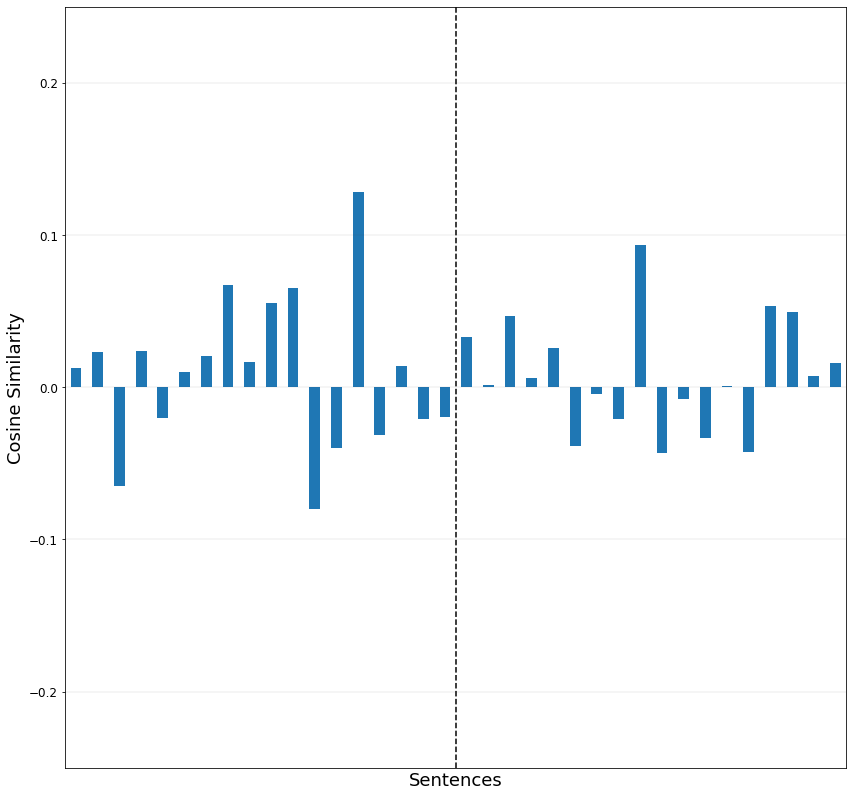

In [49]:
#ResponsibilityV
DimsTableR = []
lenght = len(thirty_six_fair_unfair)
sentence_embeddings_test_s = embed(thirty_six_fair_unfair)
        
        
for i in range(lenght):
    dot =  np.inner(ResponsibilityV,sentence_embeddings_test_s[i])
    DimsTableR.append(
            {
                'Score': dot,
                'Sentence':thirty_six_fair_unfair[i],
              
            }

    )                      
                                   
responsibility=pd.DataFrame(DimsTableR)
#df3.sort_values(by='Score', ascending=False)
        
responsibility['Score'] = responsibility['Score'].astype(float)
responsibility['Sentence'] = responsibility['Sentence'].astype(str)
responsibilityVec=responsibility

ax_res = responsibility.plot.bar(x='Sentence', y='Score', rot=90, legend=False, figsize=(14,14))

ax_res.axvline(17.5, color='k', linestyle='--')
plt.xticks([])
plt.yticks(fontsize=12)
plt.grid(color='0.3', linestyle='-', linewidth=0.1)
plt.ylabel('Cosine Similarity', fontsize=18)
plt.xlabel('Sentences', fontsize=18)
ax_res.set_facecolor("white")
ax_res.grid('on', which='major', axis='x' )
ax_res.grid('on', which='major', axis='y' )
plt.ylim(-0.25, 0.25)
plt.show()



 

In [50]:
result_res=responsibility.sort_values(by='Score', ascending=False) 
print(result_res)

       Score                                  Sentence
13  0.128209         The principal thanked the student
26  0.093723               The father murdered the boy
7   0.067519               The husband gifted the wife
10  0.065346  The student appreciated the tutor's help
9   0.055459      The president welcomed the immigrant
32  0.053509       The steward miscounted the attendee
33  0.049196           The escapee raped the policeman
20  0.046914      The teenager slandered the attendant
18  0.032764     The footballer damaged the goalkeeper
22  0.025956          The killer disfigured the person
3   0.024128          The woman picnicked with the man
1   0.023254      The brother sightsaw with the friend
6   0.020514             The workers savoured the food
8   0.016805             The groom serenaded the bride
35  0.016018          The teacher crippled the student
15  0.013818  The painter strolled with the apprentice
0   0.012397             The baby smiled at the father
5   0.0098

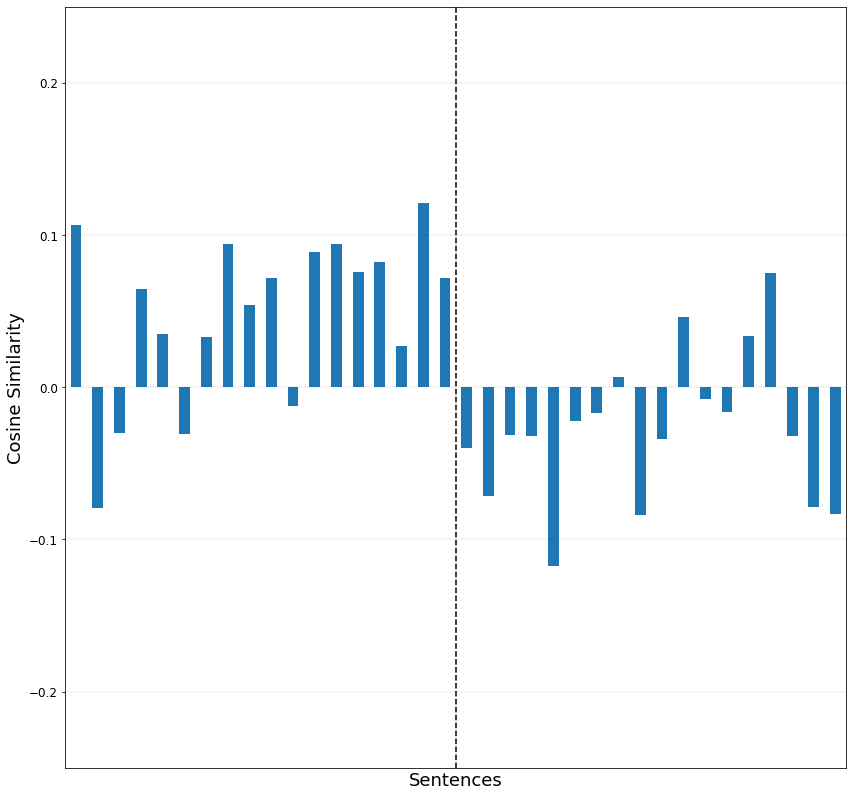

In [51]:
#EmotionV
DimsTableE = []
for i in range(lenght):
    dot =  np.inner(EmotionV,sentence_embeddings_test_s[i])
    DimsTableE.append(
            {
                'Score': dot,
                'Sentence':thirty_six_fair_unfair[i],
              
            }

    )                      
                                   
df4=pd.DataFrame(DimsTableE)

        
df4['Score'] = df4['Score'].astype(float)
df4['Sentence'] = df4['Sentence'].astype(str)
emoVec=df4



ax_res = df4.plot.bar(x='Sentence', y='Score', rot=90, legend=False, figsize=(14,14))
ax_res.axvline(17.5, color='k', linestyle='--')
plt.xticks([])

plt.ylim(-0.3, 0.3)
plt.yticks(fontsize=12)
plt.grid(color='0.3', linestyle='-', linewidth=0.1)
plt.ylabel('Cosine Similarity', fontsize=18)
plt.xlabel('Sentences', fontsize=18)
ax_res.set_facecolor("white")
ax_res.grid('on', which='major', axis='x' )
ax_res.grid('on', which='major', axis='y' )
plt.ylim(-0.25, 0.25)
plt.show()


In [52]:
result_emos=df4.sort_values(by='Score', ascending=False) 
print(result_emos)

       Score                                  Sentence
16  0.121061             The nanny comforted the child
0   0.106615             The baby smiled at the father
12  0.094449            The audience enjoyed the tenor
7   0.094346               The husband gifted the wife
11  0.089021            The crowd acclaimed the singer
14  0.082462                 Jack celebrated with Jill
13  0.075841         The principal thanked the student
32  0.075257       The steward miscounted the attendee
9   0.071846      The president welcomed the immigrant
17  0.071713                     Tom charmed the woman
3   0.064881          The woman picnicked with the man
8   0.054373             The groom serenaded the bride
28  0.046447              The man demonized the people
4   0.035035               The nurse snuggled the baby
31  0.033730        The organizer mismanaged the crowd
6   0.032862             The workers savoured the food
15  0.027094  The painter strolled with the apprentice
25  0.0065

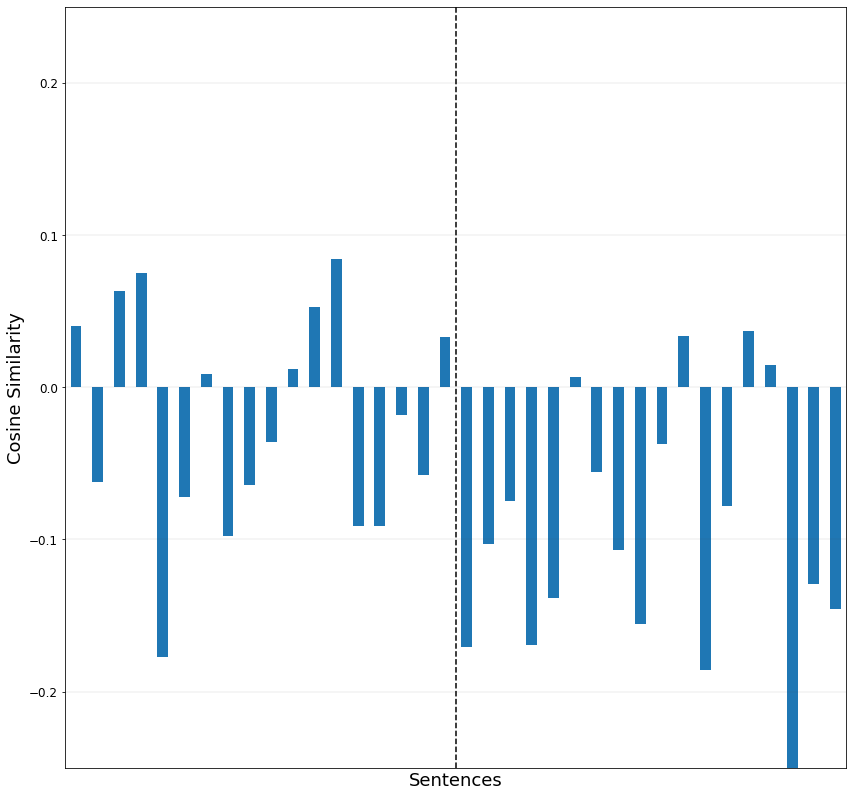

In [53]:
#ConsequenceV
DimsTableC = []
for i in range(lenght):
    dot =  np.inner(ConsequenceV,sentence_embeddings_test_s[i])
    DimsTableC.append(
            {
                'Score': dot,
                'Sentence':thirty_six_fair_unfair[i],
              
            }

    )                      
                                   
df5=pd.DataFrame(DimsTableC)

        
df5['Score'] = df5['Score'].astype(float)
df5['Sentence'] = df5['Sentence'].astype(str)
ConsqVec=df5


ax_con = df5.plot.bar(x='Sentence', y='Score', rot=90, legend=False, figsize=(14,14))
ax_con.axvline(17.5, color='k', linestyle='--')
ax_con.set_facecolor("white")

plt.xticks([])
plt.yticks(fontsize=12)
plt.grid(color='0.3', linestyle='-', linewidth=0.1)
plt.ylabel('Cosine Similarity', fontsize=18)
plt.xlabel('Sentences', fontsize=18)


ax_con.grid('on', which='major', axis='x' )
ax_con.grid('on', which='major', axis='y' )
plt.ylim(-0.25, 0.25)
plt.show()


In [54]:
result_consq=df5.sort_values(by='Score', ascending=False) 
print(result_consq)

       Score                                  Sentence
12  0.084535            The audience enjoyed the tenor
3   0.075072          The woman picnicked with the man
2   0.063396                          Mary cheered Tim
11  0.052419            The crowd acclaimed the singer
0   0.039936             The baby smiled at the father
31  0.036690        The organizer mismanaged the crowd
28  0.033448              The man demonized the people
17  0.033347                     Tom charmed the woman
32  0.014955       The steward miscounted the attendee
10  0.011917  The student appreciated the tutor's help
6   0.008563             The workers savoured the food
23  0.006844      The saboteur contaminated the people
15 -0.018416  The painter strolled with the apprentice
9  -0.036094      The president welcomed the immigrant
27 -0.037387    The attendant misinformed the customer
24 -0.055482             The guard dehumanized the man
16 -0.057949             The nanny comforted the child
1  -0.0620

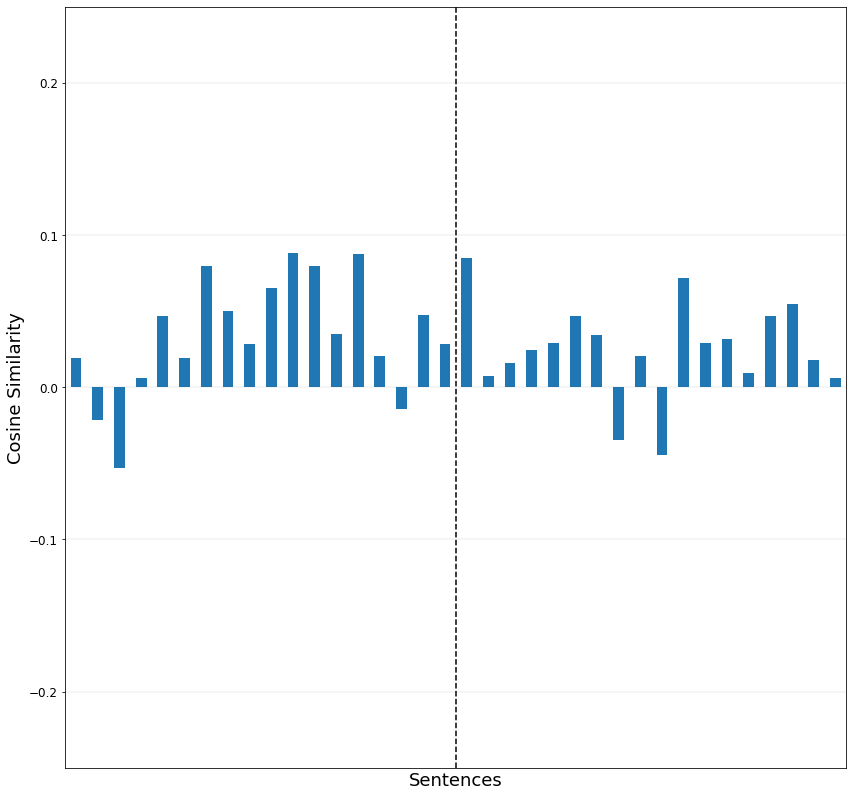

In [55]:
#BeneficialV
DimsTableM = []
for i in range(lenght):
    dot =  np.inner(BeneficialV,sentence_embeddings_test_s[i])
    DimsTableM.append(
            {
                'Score': dot,
                'Sentence':thirty_six_fair_unfair[i],
              
            }

    )                      
                                   
df6=pd.DataFrame(DimsTableM)

        
df6['Score'] = df6['Score'].astype(float)
df6['Sentence'] = df6['Sentence'].astype(str)
BenVec=df6


ax_ben = df6.plot.bar(x='Sentence', y='Score', rot=90, legend=False, figsize=(14,14))
ax_ben.axvline(17.5, color='k', linestyle='--')
ax_ben.set_facecolor("white")

plt.xticks([])
plt.yticks(fontsize=12)
plt.grid(color='0.3', linestyle='-', linewidth=0.1)
plt.ylabel('Cosine Similarity', fontsize=18)
plt.xlabel('Sentences', fontsize=18)


ax_ben.grid('on', which='major', axis='x' )
ax_ben.grid('on', which='major', axis='y' )
plt.ylim(-0.25, 0.25)


plt.show()


In [56]:
result_ben=df6.sort_values(by='Score', ascending=False) 
print(result_ben)

       Score                                  Sentence
10  0.088395  The student appreciated the tutor's help
13  0.087850         The principal thanked the student
18  0.084772     The footballer damaged the goalkeeper
6   0.079474             The workers savoured the food
11  0.079460            The crowd acclaimed the singer
28  0.071975              The man demonized the people
9   0.065319      The president welcomed the immigrant
33  0.054494           The escapee raped the policeman
7   0.050166               The husband gifted the wife
16  0.047552             The nanny comforted the child
4   0.047015               The nurse snuggled the baby
23  0.046855      The saboteur contaminated the people
32  0.046519       The steward miscounted the attendee
12  0.035153            The audience enjoyed the tenor
24  0.034074             The guard dehumanized the man
30  0.031935                 The man sickened the lady
22  0.029357          The killer disfigured the person
29  0.0291

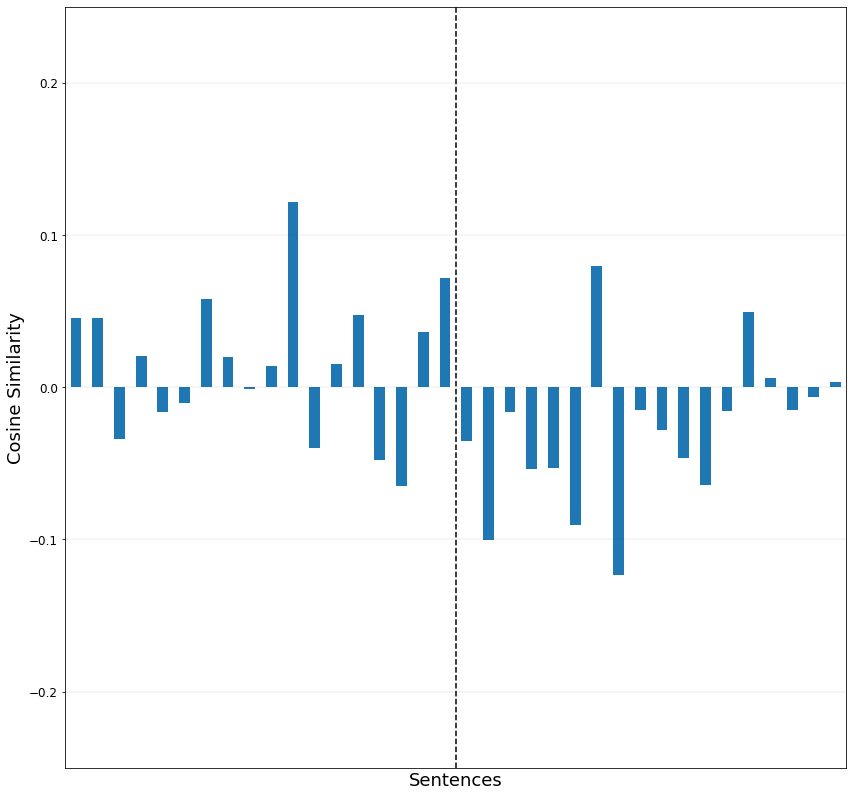

In [57]:
#HarmV
DimsTableH = []
for i in range(lenght):
    dot =  np.inner(HarmV,sentence_embeddings_test_s[i])
    DimsTableH.append(
            {
                'Score': dot,
                'Sentence':thirty_six_fair_unfair[i],
              
            }

    )                      
                                   
df7=pd.DataFrame(DimsTableH)

df7['Score'] = df7['Score'].astype(float)
df7['Sentence'] = df7['Sentence'].astype(str)
HarmVec=df7

ax_harm = df7.plot.bar(x='Sentence', y='Score', rot=90, legend=False, figsize=(14,14))
ax_harm.axvline(17.5, color='k', linestyle='--')
ax_harm.set_facecolor("white")

plt.xticks([])
plt.yticks(fontsize=12)
plt.grid(color='0.3', linestyle='-', linewidth=0.1)
plt.ylabel('Cosine Similarity', fontsize=18)
plt.xlabel('Sentences', fontsize=18)


ax_harm.grid('on', which='major', axis='x' )
ax_harm.grid('on', which='major', axis='y' )
plt.ylim(-0.25, 0.25)
plt.show()


In [58]:
result_harm=df7.sort_values(by='Score', ascending=False) 
print(result_harm)

       Score                                  Sentence
10  0.121760  The student appreciated the tutor's help
24  0.079860             The guard dehumanized the man
17  0.071627                     Tom charmed the woman
6   0.057699             The workers savoured the food
31  0.049426        The organizer mismanaged the crowd
13  0.047437         The principal thanked the student
0   0.045637             The baby smiled at the father
1   0.045204      The brother sightsaw with the friend
16  0.036019             The nanny comforted the child
3   0.020645          The woman picnicked with the man
7   0.020013               The husband gifted the wife
12  0.015153            The audience enjoyed the tenor
9   0.014161      The president welcomed the immigrant
32  0.005978       The steward miscounted the attendee
35  0.003357          The teacher crippled the student
8  -0.001214             The groom serenaded the bride
34 -0.006354        The army slaughtered the childeren
5  -0.0104

In [59]:
def plot_similarity(labels, features, rotation):
  corr = np.inner(features, features)
  sns.set(font_scale=6)
  fig, ax = plt.subplots(figsize=(100,100))  
  g = sns.heatmap(
      corr,
      xticklabels=labels,
      yticklabels=labels,
      vmin=0,
      vmax=1,
      cmap="YlOrRd",
      square=True, annot=True)
  g.set_xticklabels(labels, rotation=rotation)
  g.set_title("Semantic Textual Similarity")
    
def run_and_plot(messages_):
  message_embeddings_ = embed(messages_)
  plot_similarity(messages_, message_embeddings_, 90)

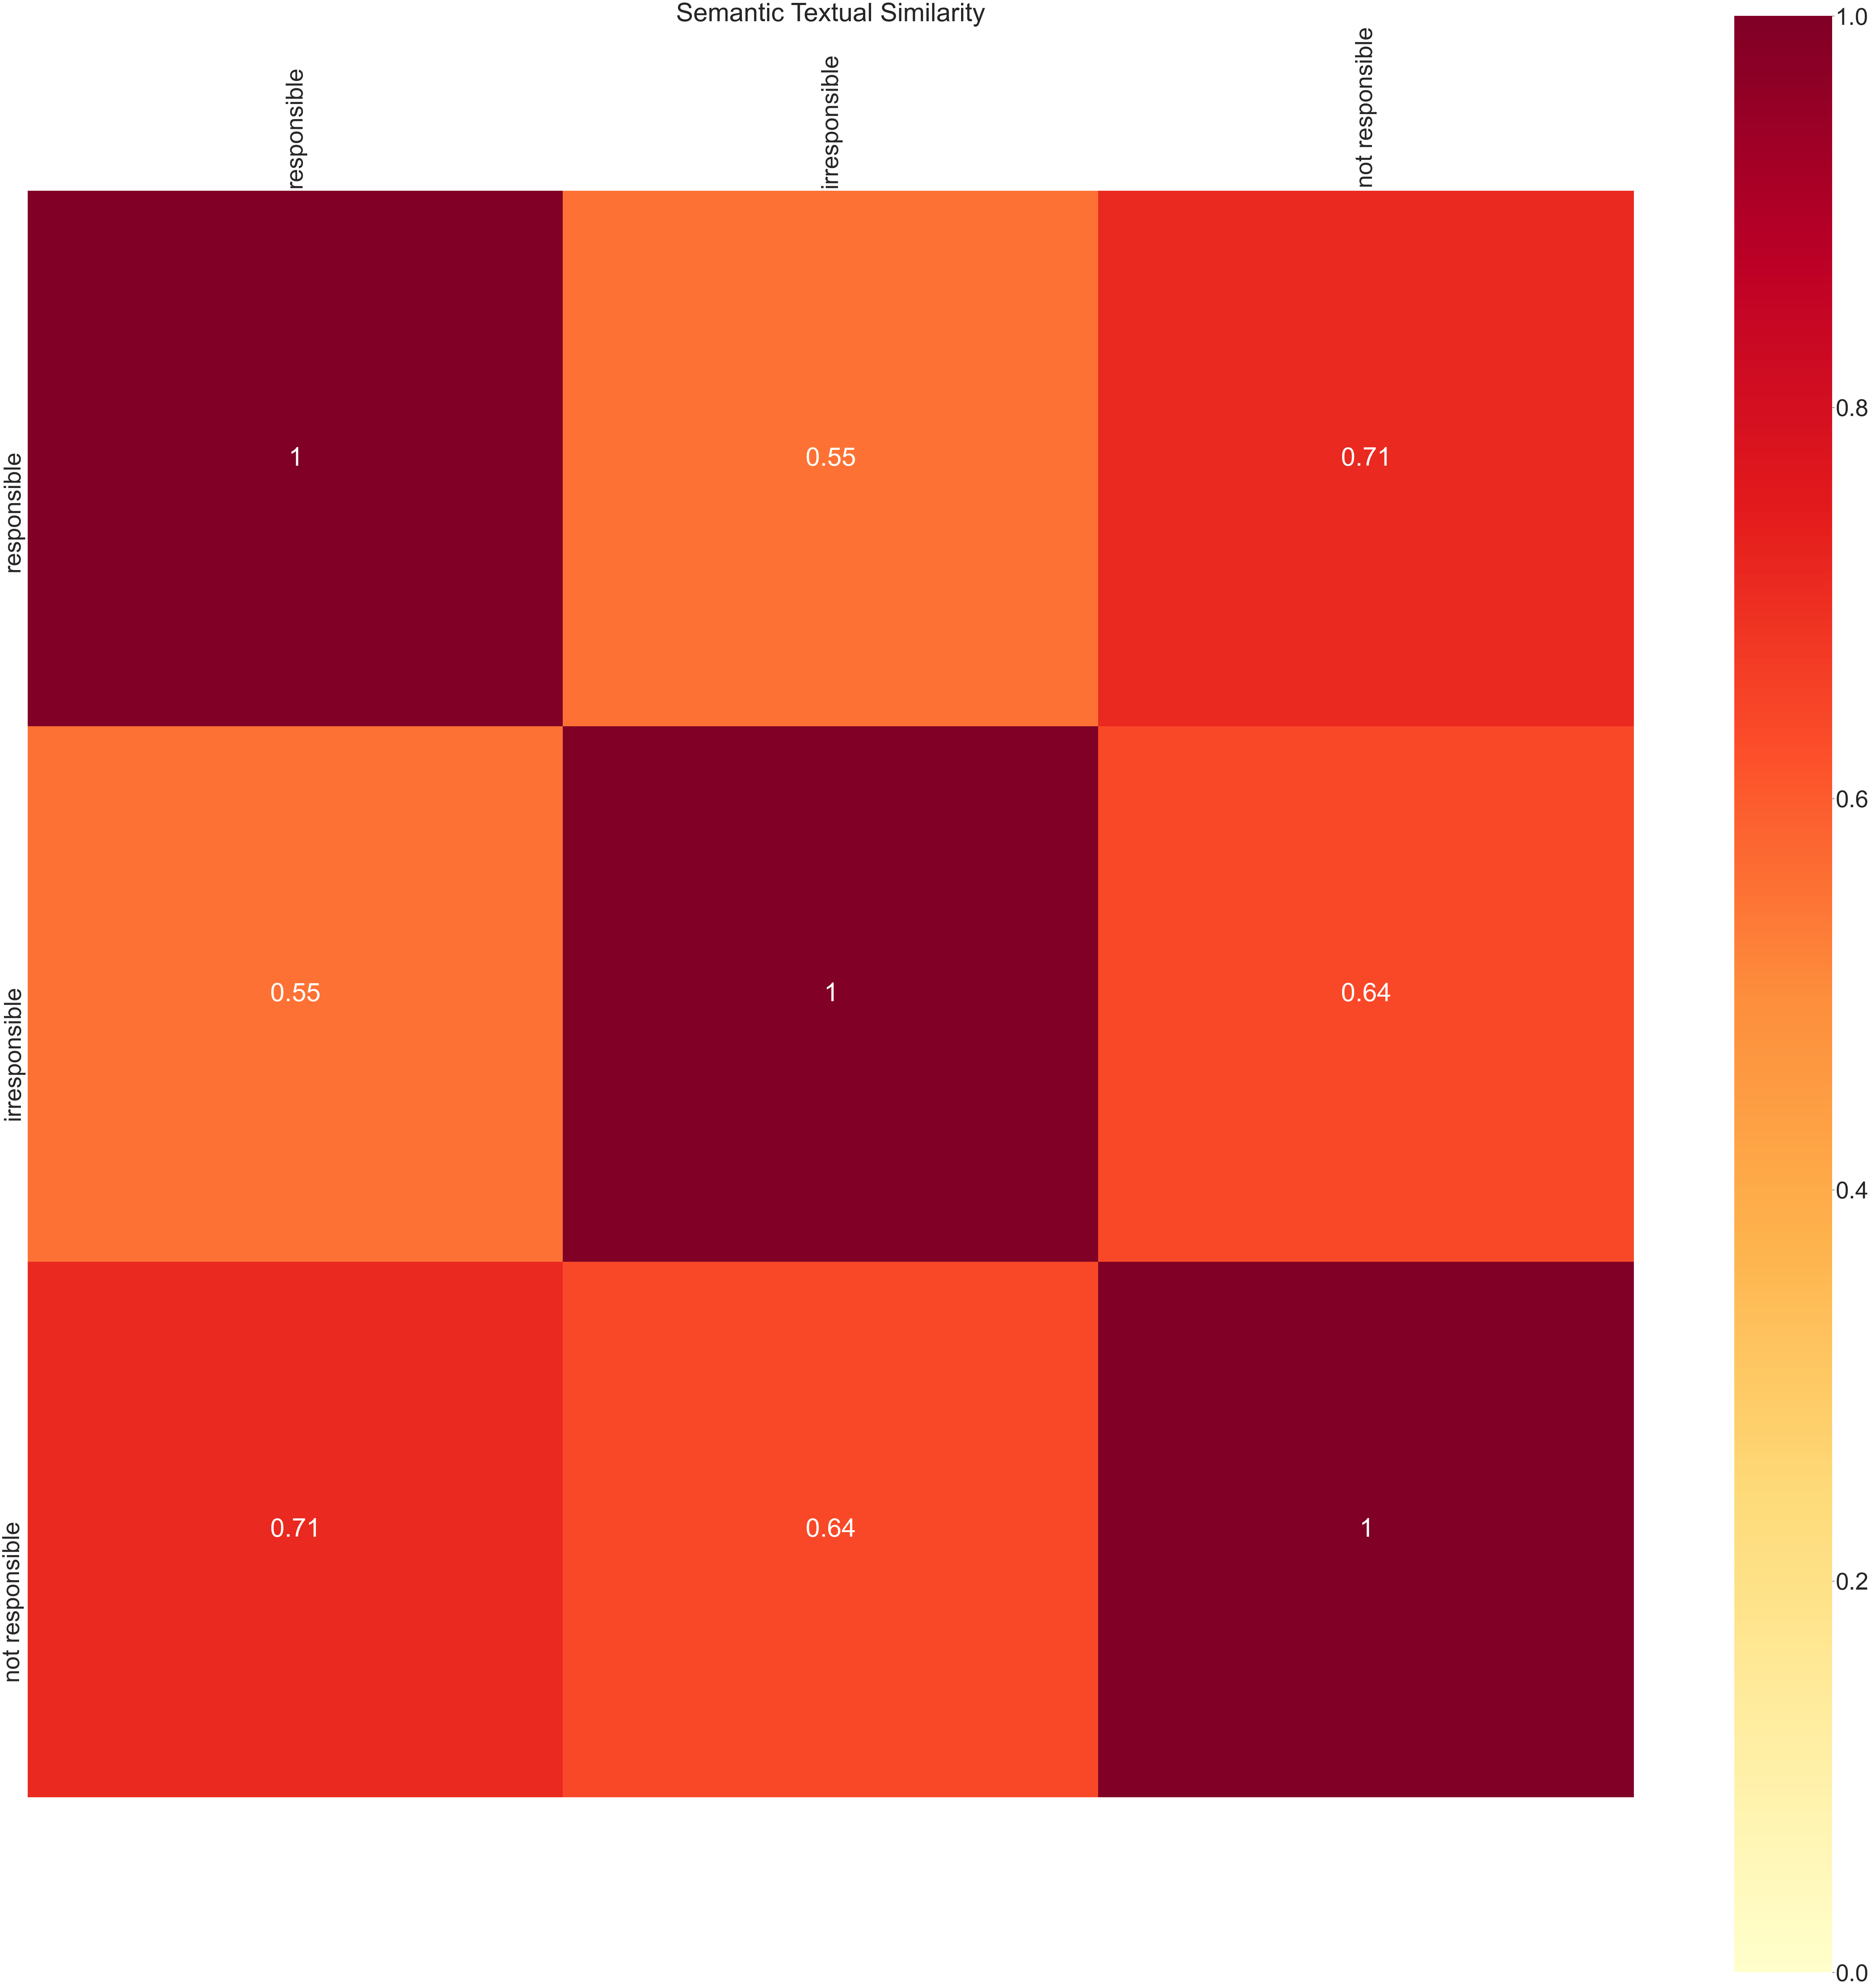

In [60]:
#Test similarity score of USE for Vector phrases 
messages = [
    
    "responsible",
   
    "irresponsible",
    
    "not responsible",
   
   
]

plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True

run_and_plot(messages)



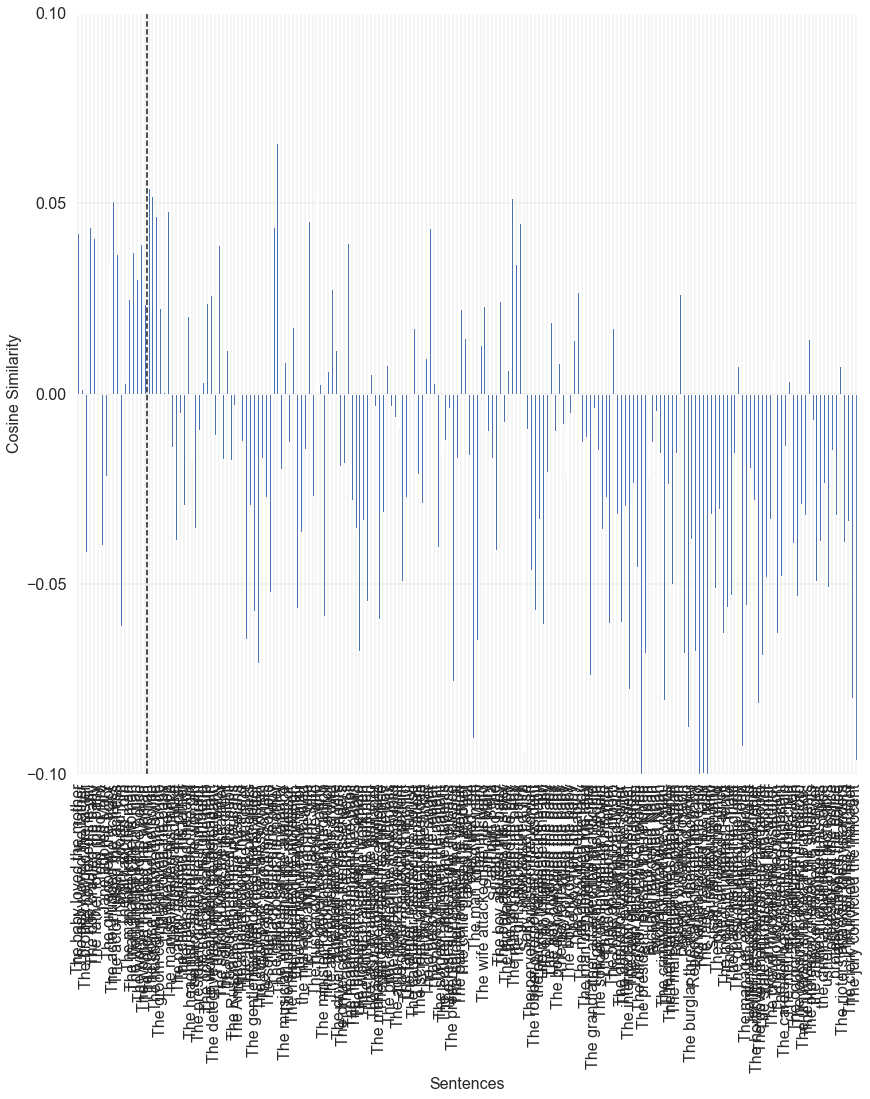

In [61]:
ax_word_fair = word_fair_results.plot.bar(x='Sentence', y='Score', legend=False, figsize=(14,14))
ax_word_fair.tick_params(labelbottom=True,labeltop=False)
plt.xticks(rotation = 90)
ax_word_fair.axvline(17.5, color='k', linestyle='--')
ax_word_fair.set_facecolor("white")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.grid(color='0.3', linestyle='-', linewidth=0.1)
plt.ylabel('Cosine Similarity', fontsize=16)
plt.xlabel('Sentences', fontsize=16)
plt.ylim(-0.1, 0.1)
plt.grid(True, which='both')

plt.show()


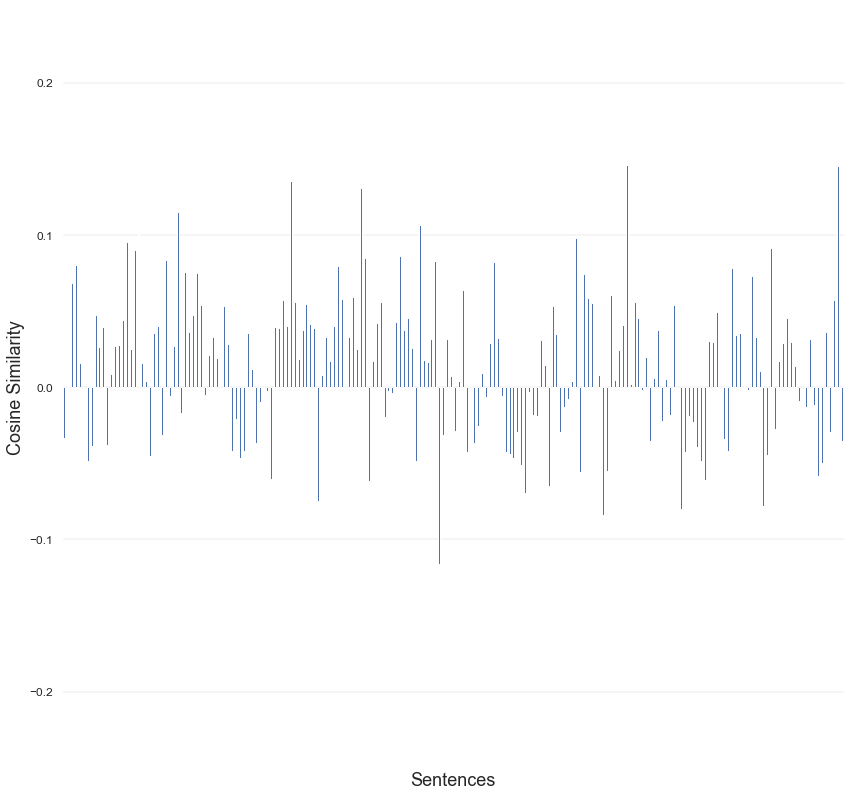

In [62]:
#ResponsibilityV
DimsTableR200 = []
lenght = len(fair_unfair)
sentence_embeddings_test_s_200 = embed(fair_unfair)
        
        
for i in range(lenght):
    dot =  np.inner(ResponsibilityV,sentence_embeddings_test_s_200[i])
    DimsTableR200.append(
            {
                'Score': dot,
                'Sentence':fair_unfair[i],
              
            }

    )                      
                                   
responsibility_200=pd.DataFrame(DimsTableR200)
#df3.sort_values(by='Score', ascending=False)
        
responsibility_200['Score'] = responsibility_200['Score'].astype(float)
responsibility_200['Sentence'] = responsibility_200['Sentence'].astype(str)
responsibilityVec200=responsibility_200

ax_res = responsibility_200.plot.bar(x='Sentence', y='Score', rot=90, legend=False, figsize=(14,14))

#ax_res.axvline(17.5, color='k', linestyle='--')
plt.xticks([])
plt.yticks(fontsize=12)
plt.grid(color='0.3', linestyle='-', linewidth=0.1)
plt.ylabel('Cosine Similarity', fontsize=18)
plt.xlabel('Sentences', fontsize=18)
ax_res.set_facecolor("white")
ax_res.grid('on', which='major', axis='x' )
ax_res.grid('on', which='major', axis='y' )
plt.ylim(-0.25, 0.25)
plt.show()



 

In [63]:
lenght = len(fair_unfair)
sentence_embeddings_test_s = embed(fair_unfair)

#ResponsibilityV

DimsTableR = []

for i in range(lenght):
    dot =  np.inner(ResponsibilityV,sentence_embeddings_test_s[i])
    DimsTableR.append(
            {
                'Responsibility': dot,
               # 'Sentence':fair_unfair[i],
              
            }

    )                      
                                   
responsibility=pd.DataFrame(DimsTableR)
#df3.sort_values(by='Score', ascending=False)
        
responsibility['Responsibility'] = responsibility['Responsibility'].astype(float)
#responsibility['Sentence'] = responsibility['Sentence'].astype(str)
responsibilityVec=responsibility

   

#EmotionV
DimsTableE = []
for i in range(lenght):
    dot =  np.inner(EmotionV,sentence_embeddings_test_s[i])
    DimsTableE.append(
            {
                'Emotion': dot,
             #   'Sentence':fair_unfair[i],
              
            }

    )                      
                                   
df4=pd.DataFrame(DimsTableE)
   
df4['Emotion'] = df4['Emotion'].astype(float)
#df4['Sentence'] = df4['Sentence'].astype(str)
emoVec=df4

#Harm
DimsTableH = []
for i in range(lenght):
    dot =  np.inner(HarmV,sentence_embeddings_test_s[i])
    DimsTableH.append(
            {
                'Harm': dot,
              #  'Sentence':fair_unfair[i],
              
            }

    )                      
                                   
df7=pd.DataFrame(DimsTableH)

df7['Harm'] = df7['Harm'].astype(float)
#df7['Sentence'] = df7['Sentence'].astype(str)
HarmVec=df7

#ConsequenceV
DimsTableC = []
for i in range(lenght):
    dot =  np.inner(ConsequenceV,sentence_embeddings_test_s[i])
    DimsTableC.append(
            {
                'Consequence': dot,
             #   'Sentence':fair_unfair[i],
              
            }

    )                      
                                   
df5=pd.DataFrame(DimsTableC)

        
df5['Consequence'] = df5['Consequence'].astype(float)
#df5['Sentence'] = df5['Sentence'].astype(str)
ConsqVec=df5


#BeneficialV
DimsTableM = []
for i in range(lenght):
    dot =  np.inner(BeneficialV,sentence_embeddings_test_s[i])
    DimsTableM.append(
            {
                'Benefit': dot,
              #  'Sentence':fair_unfair[i],
              
            }

    )                      
                                   
df6=pd.DataFrame(DimsTableM)

        
df6['Benefit'] = df6['Benefit'].astype(float)
#df6['Sentence'] = df6['Sentence'].astype(str)
BenVec=df6




In [64]:
combined = pd.concat([BenVec, ConsqVec, HarmVec, emoVec, responsibilityVec], axis=1)

In [65]:
print(combined)

      Benefit  Consequence      Harm   Emotion  Responsibility
0    0.073815    -0.091193  0.064646  0.030608       -0.033281
1    0.065565    -0.063299  0.045951  0.061002        0.000556
2    0.025772    -0.059306  0.112916 -0.051628        0.068343
3    0.064051    -0.051927  0.049897  0.000342        0.080208
4    0.079393    -0.168796 -0.036155  0.032264        0.015954
5    0.064089    -0.028365  0.064859  0.064155       -0.000529
6    0.008301     0.066758  0.052060  0.017615       -0.048678
7    0.004033    -0.071338  0.010939  0.066772       -0.038810
8    0.058443    -0.138364  0.016731 -0.067252        0.047251
9    0.047173    -0.161899 -0.010375 -0.089596        0.026351
10   0.040201    -0.192822 -0.070107 -0.059048        0.039491
11  -0.021018     0.015735  0.012403 -0.013053       -0.038050
12   0.014354     0.002530  0.067348 -0.009503        0.008780
13   0.068229     0.091998  0.122245  0.157380        0.026797
14   0.075979     0.052430  0.128685  0.158999        0

In [66]:
df = pd.DataFrame(index=range(0, 200), columns=['Evaluation'],
                  dtype='float')

df.iloc[0:100] = 'fair'
df.iloc[100:200] = 'unfair'
df['Evaluation'] = df['Evaluation'].astype(str)
print(df)



    Evaluation
0         fair
1         fair
2         fair
3         fair
4         fair
5         fair
6         fair
7         fair
8         fair
9         fair
10        fair
11        fair
12        fair
13        fair
14        fair
15        fair
16        fair
17        fair
18        fair
19        fair
20        fair
21        fair
22        fair
23        fair
24        fair
25        fair
26        fair
27        fair
28        fair
29        fair
30        fair
31        fair
32        fair
33        fair
34        fair
35        fair
36        fair
37        fair
38        fair
39        fair
40        fair
41        fair
42        fair
43        fair
44        fair
45        fair
46        fair
47        fair
48        fair
49        fair
50        fair
51        fair
52        fair
53        fair
54        fair
55        fair
56        fair
57        fair
58        fair
59        fair
60        fair
61        fair
62        fair
63        fair
64        fair
65        

In [67]:
combined_with_correct_label = pd.concat([BenVec, ConsqVec, HarmVec, emoVec, responsibilityVec, df], axis=1)

In [68]:
print(combined_with_correct_label)

      Benefit  Consequence      Harm   Emotion  Responsibility Evaluation
0    0.073815    -0.091193  0.064646  0.030608       -0.033281       fair
1    0.065565    -0.063299  0.045951  0.061002        0.000556       fair
2    0.025772    -0.059306  0.112916 -0.051628        0.068343       fair
3    0.064051    -0.051927  0.049897  0.000342        0.080208       fair
4    0.079393    -0.168796 -0.036155  0.032264        0.015954       fair
5    0.064089    -0.028365  0.064859  0.064155       -0.000529       fair
6    0.008301     0.066758  0.052060  0.017615       -0.048678       fair
7    0.004033    -0.071338  0.010939  0.066772       -0.038810       fair
8    0.058443    -0.138364  0.016731 -0.067252        0.047251       fair
9    0.047173    -0.161899 -0.010375 -0.089596        0.026351       fair
10   0.040201    -0.192822 -0.070107 -0.059048        0.039491       fair
11  -0.021018     0.015735  0.012403 -0.013053       -0.038050       fair
12   0.014354     0.002530  0.067348 -

In [69]:
x=combined_with_correct_label

C:\Users\AI\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\AI\anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
C:\Users\AI\anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


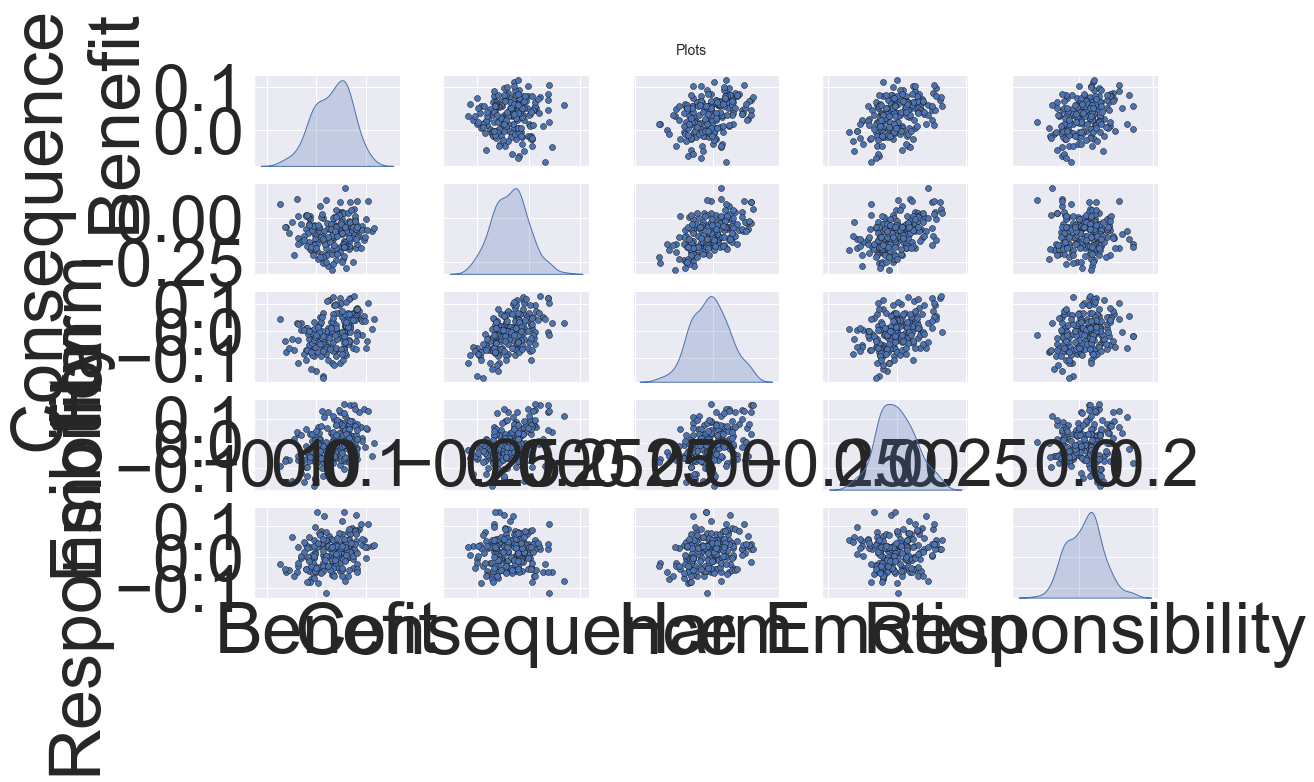

In [70]:
# Pair-wise Scatter Plots
cols = ['Benefit', 'Consequence','Harm','Emotion','Responsibility']
pp = sns.pairplot(combined_with_correct_label[cols], size=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Plots', fontsize=14)


In [71]:
features = ['Benefit', 'Consequence','Harm','Emotion','Responsibility']
# Separating out the features
x = combined_with_correct_label.loc[:, features].values
# Separating out the target
y = combined_with_correct_label.loc[:,['Evaluation']].values

In [72]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(combined)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [73]:
finalDf  = pd.concat([principalDf, df[['Evaluation']]], axis = 1)

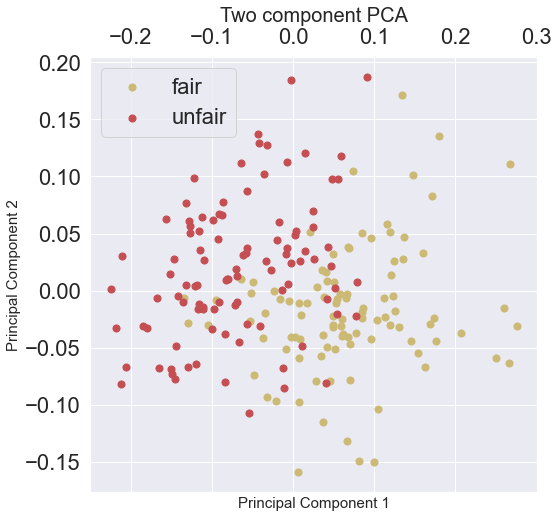

In [118]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Two component PCA', fontsize = 20)
targets = ['fair', 'unfair']
colors = ['y', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Evaluation'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)



In [119]:
pca.explained_variance_ratio_

array([0.55716179, 0.17840937, 0.14717766, 0.07718214])

In [120]:
.55+.19

0.74

In [121]:
#alternative package to plot:
fig = px.scatter(components, x=0, y=1, color=df['Evaluation'])
fig.show()

In [ ]:
# all PCA components

In [ ]:
print(df)

In [ ]:
print(combined_with_correct_label)

In [82]:


df = combined_with_correct_label
features = ['Benefit', 'Consequence','Harm','Emotion','Responsibility']

fig = px.scatter_matrix(
    df,
    dimensions=features,
    color="Evaluation"
)
fig.update_traces(diagonal_visible=False)
fig.show()


C:\Users\AI\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



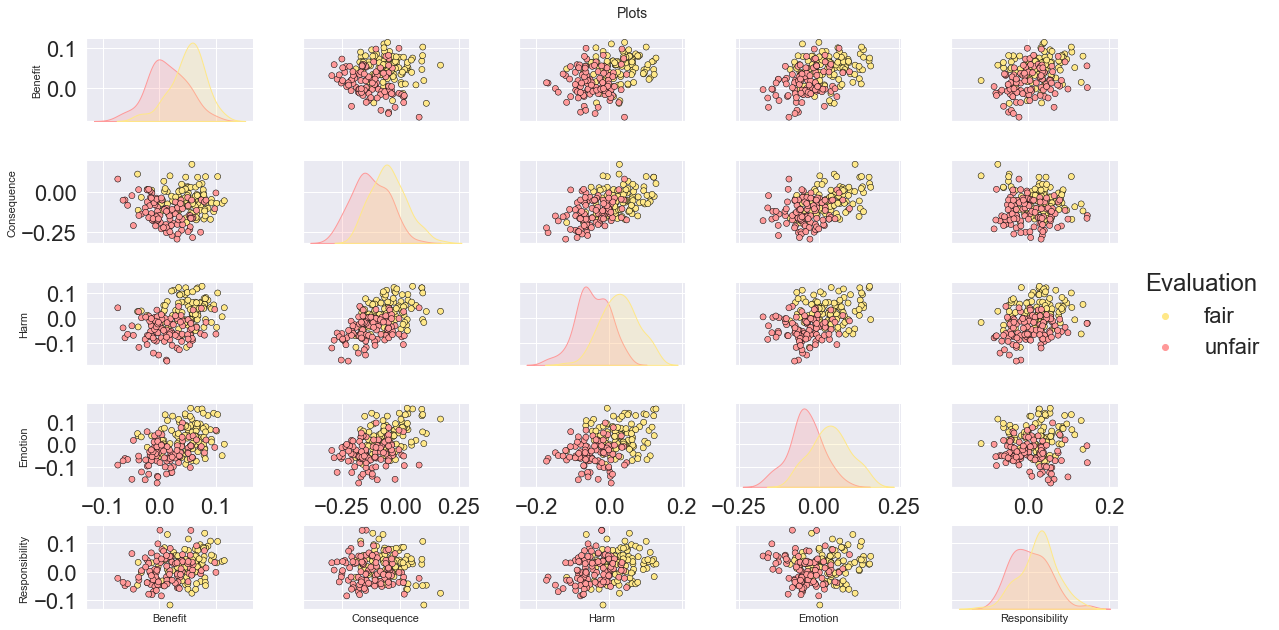

In [114]:
# Scatter Plot with Hue for visualizing data in 3-D
cols = ['Benefit', 'Consequence','Harm','Emotion','Responsibility', 'Evaluation']
pp = sns.pairplot(combined_with_correct_label[cols], hue='Evaluation', size=1.8, aspect=1.8, 
                  palette={"unfair": "#FF9999", "fair": "#FFE888"},
                  plot_kws=dict(edgecolor="black", linewidth=0.5))
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Plots', fontsize=14)

plt.rcParams["axes.labelsize"] = 9

In [84]:
#use 3 PCA components

import plotly.express as px
from sklearn.decomposition import PCA

df = combined_with_correct_label
features = ['Benefit', 'Consequence','Harm','Emotion','Responsibility']

pca = PCA()
components = pca.fit_transform(df[features])
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(4),
    color=df["Evaluation"]
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [85]:
# 3 PCA
import plotly.express as px
from sklearn.decomposition import PCA

df = combined_with_correct_label
X = df[['Benefit', 'Consequence','Harm','Emotion','Responsibility']]

pca = PCA(n_components=3)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=df['Evaluation'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

In [86]:
#visualise loadings

import plotly.express as px
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler


df = combined_with_correct_label
features = ['Benefit', 'Consequence','Harm','Emotion','Responsibility']
X = df[features]

pca = PCA(n_components=2)
components = pca.fit_transform(X)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig = px.scatter(components, x=0, y=1, color=df['Evaluation'])

for i, feature in enumerate(features):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0],
        y1=loadings[i, 1]
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
    )
fig.show()


In [87]:
#some plots with both combined_with_correct_label and finalDf

In [123]:
y=y.ravel()
from sklearn.model_selection import train_test_split
# test_size: what proportion of original data is used for test set
train_img, test_img, train_lbl, test_lbl = train_test_split( x, y, test_size=1/7.0, random_state=0)
 


In [124]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)

In [125]:
pca.fit(train_img)

PCA(n_components=0.95)

In [126]:
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

In [127]:
from sklearn.linear_model import LogisticRegression

In [128]:
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [129]:
logisticRegr.fit(train_img, train_lbl)

LogisticRegression()

In [130]:
logisticRegr.predict(test_img[0].reshape(1,-1))

array(['fair'], dtype=object)

In [131]:
logisticRegr.predict(test_img[0:10])

array(['fair', 'unfair', 'unfair', 'fair', 'fair', 'unfair', 'fair',
       'unfair', 'fair', 'unfair'], dtype=object)

In [132]:
logisticRegr.score(test_img, test_lbl)

0.8620689655172413

In [133]:
#use below for F1

In [134]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

#CV scores, 5 fold CV
scores = cross_val_score(logisticRegr, train_img, train_lbl, cv=5)

#Prediction and accuracy
y_pred = logisticRegr.predict(test_img)
accuracy_test = accuracy_score(test_lbl, y_pred)

#Print the summary
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print ("Test Accuracy: %0.2f" % (accuracy_test))

Accuracy: 0.80 (+/- 0.15)
Test Accuracy: 0.86


In [135]:
# Score
score = logisticRegr.score(test_img, test_lbl)
print ("Accuracy: %0.2f" % (score))

#Prediction
predictions = logisticRegr.predict(test_img)
predictions

Accuracy: 0.86


array(['fair', 'unfair', 'unfair', 'fair', 'fair', 'unfair', 'fair',
       'unfair', 'fair', 'unfair', 'fair', 'unfair', 'unfair', 'fair',
       'fair', 'fair', 'fair', 'fair', 'fair', 'fair', 'unfair', 'unfair',
       'fair', 'unfair', 'fair', 'unfair', 'unfair', 'fair', 'unfair'],
      dtype=object)

Confusion Matrix: 
 [[12  0]
 [ 4 13]]


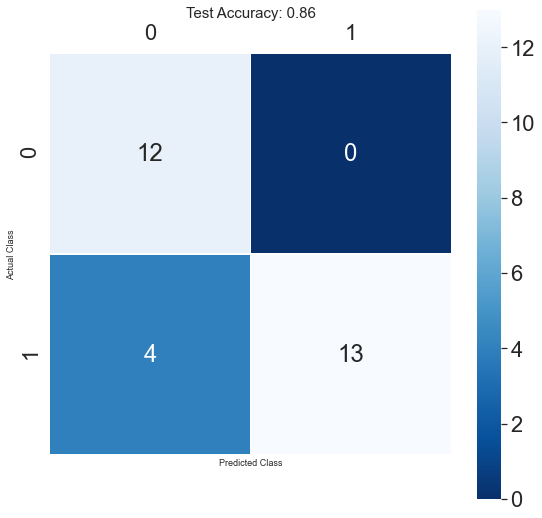

In [136]:
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

#confusion matrix
cm = metrics.confusion_matrix(test_lbl, predictions)
print("Confusion Matrix: \n", cm)

#Visualize the confusion matrix
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual Class');
plt.xlabel('Predicted Class');
all_sample_title = "Test Accuracy: %0.2f" % (score)
plt.title(all_sample_title, size = 15);

In [102]:
#x_train, x_test, y_train, y_test

In [103]:
#train_img, test_img, train_lbl, test_lbl

In [137]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#Splitting
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

#LR model
logisticRegr = LogisticRegression()

#Fit
logisticRegr.fit(x_train, y_train)

LogisticRegression()

In [138]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

#CV scores, 5 fold CV
scores = cross_val_score(logisticRegr, x_train, y_train, cv=5)

#Prediction and accuracy
y_pred = logisticRegr.predict(x_test)
accuracy_test = accuracy_score(y_test, y_pred)

#Print the summary
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print ("Test Accuracy: %0.2f" % (accuracy_test))

Accuracy: 0.82 (+/- 0.15)
Test Accuracy: 0.82


In [139]:
# Score
score = logisticRegr.score(x_test, y_test)
print ("Accuracy: %0.2f" % (score))

#Prediction
predictions = logisticRegr.predict(x_test)
predictions

Accuracy: 0.82


array(['fair', 'unfair', 'unfair', 'fair', 'fair', 'unfair', 'fair',
       'unfair', 'fair', 'unfair', 'fair', 'unfair', 'unfair', 'fair',
       'fair', 'fair', 'fair', 'fair', 'fair', 'fair', 'unfair', 'unfair',
       'fair', 'unfair', 'fair', 'unfair', 'unfair', 'fair', 'unfair',
       'fair', 'fair', 'fair', 'unfair', 'unfair', 'fair', 'unfair',
       'fair', 'unfair', 'unfair', 'unfair'], dtype=object)

In [140]:
train_img, test_img, train_lbl, test_lbl
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Confusion Matrix: 
 [[16  2]
 [ 5 17]]


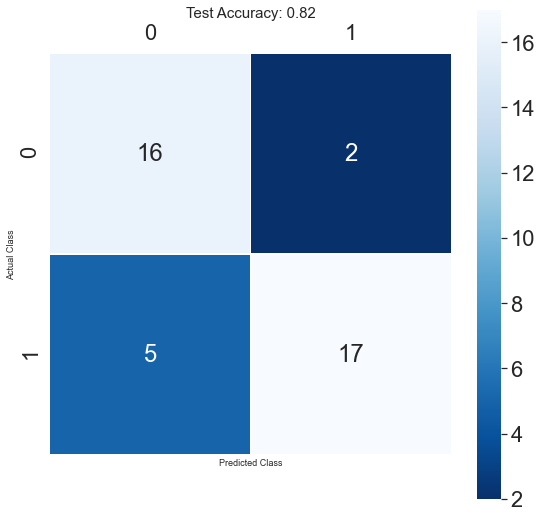

In [141]:
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

#confusion matrix
cm = metrics.confusion_matrix(y_test, predictions)
print("Confusion Matrix: \n", cm)

#Visualize the confusion matrix
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual Class');
plt.xlabel('Predicted Class');
all_sample_title = "Test Accuracy: %0.2f" % (score)
plt.title(all_sample_title, size = 15);

In [109]:
#Repeat above but class with  direct from sentences

from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble


from keras.preprocessing import text, sequence
from keras import layers, models, optimizers